In [350]:
using LinearAlgebra
using Flux
using DiffEqFlux
using OrdinaryDiffEq
using DiffEqSensitivity
using GalacticOptim
using Printf
using MLUtils
using IterTools: ncycle
using CUDA
using BSON: @save, @load

include("src/equations/initial_functions.jl")
include("src/equations/equations.jl")
include("src/utils/graphic_tools.jl")
include("src/utils/generators.jl")
include("src/neural_ode/models.jl")
include("src/examples/burgers/burgers_combined_optimizer.jl")
include("src/examples/burgers/burgers_cnn.jl")

Main.BurgersCNN

In [4]:
dataset = Generator.read_dataset("./src/examples/burgers/dataset/viscous_burgers_high_dim_m10_256_j173.jld2")["training_set"];

In [5]:
t_max = 2.; # 6 (godunov)
t_min = 0.;
x_max = pi; # 2pi (godunov)
x_min = 0.;
t_n = 64;
x_n = 64;

nu = 0.04;

dt = round((t_max - t_min) / (t_n - 1), digits=8);
dx = round((x_max - x_min) / (x_n - 1), digits=8);

t = LinRange(t_min, t_max, t_n);
x = LinRange(x_min, x_max, x_n);

In [6]:
add_dim(x::Array{Float64, 1}) = reshape(x, (size(x)[1], 1, 1))
add_dim(x::Array) = reshape(x, (size(x)[1], 1, size(x)[2]))
del_dim(x::Array) = reshape(x, (size(x)[1], size(x)[3], size(x)[4]))

del_dim (generic function with 1 method)

In [98]:
function main()
  batch_size = 8;
  epochs = 100;
  ratio = 0.75;
  noise = 0.05;
  lr = 0.003;
  r = 1e-7;

  data = Generator.read_dataset("./src/examples/burgers/dataset/viscous_burgers_high_dim_m10_256_j173.jld2")["training_set"];
  opt = Flux.Optimiser(Flux.WeightDecay(r), Flux.ADAM(lr, (0.9, 0.999), 1.0e-8));
  model = Models.CNN2(9, [2, 2, 1]);
  K, p, _, l_val = BurgersCNN.training(model, epochs, data, opt, batch_size, ratio, noise, Tsit5());
  return K, p
end

K, p = main()

┌ Info: Training on CPU
└ @ Main.BurgersCNN /Users/vdesgrange/Development/Etudes/Thesis/closure-model/experiments/julia_src/neural_closure/src/examples/burgers/burgers_cnn.jl:24
┌ Info: Loading dataset
└ @ Main.BurgersCNN /Users/vdesgrange/Development/Etudes/Thesis/closure-model/experiments/julia_src/neural_closure/src/examples/burgers/burgers_cnn.jl:30
┌ Info: Building model
└ @ Main.BurgersCNN /Users/vdesgrange/Development/Etudes/Thesis/closure-model/experiments/julia_src/neural_closure/src/examples/burgers/burgers_cnn.jl:33
┌ Info: Train
└ @ Main.BurgersCNN /Users/vdesgrange/Development/Etudes/Thesis/closure-model/experiments/julia_src/neural_closure/src/examples/burgers/burgers_cnn.jl:80
┌ Info: Epoch 1
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 1.1752382713383078
lval = 1.0504854429559545
ltrain = 1.1355166634224536
lval = 1.0114739508023847
ltrain = 1.100930406791963
lval = 0.9763487709317364
ltrain = 1.064947170717655
lval = 0.9434139995217862
ltrain = 1.031397218928477
lval = 0.9130455862743304
ltrain = 1.005452815307925
lval = 0.8844706585359094
ltrain = 0.9615216971442767
lval = 0.8571770500090141
ltrain = 0.9361161357798244
lval = 0.8318375222424963
ltrain = 0.9074444182539896
lval = 0.8077584834745101
ltrain = 0.8783966236904545
lval = 0.7847962128545023
ltrain = 0.8478440561213083
lval = 0.7630410445395555
ltrain = 0.8240172163579387
lval = 0.7420477776828494
ltrain = 0.8024809797159062
lval = 0.7215669600603368
ltrain = 0.7777086212645975
lval = 0.7016211188235428
ltrain = 0.7614324326901986
lval = 0.6820294301859899
ltrain = 0.7378203464930562
lval = 0.6628397461846212
ltrain = 0.7156113895754544
lval = 0.6439990359419216
ltrain = 0.6947109780322159
lval = 0.6254864095092698
ltrain = 0.6709323859324332
lval

┌ Info: Epoch 2
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.5633979770063902
lval = 0.5059794232694346
ltrain = 0.5461675071717808
lval = 0.49021982422634003
ltrain = 0.5313331623335743
lval = 0.4748863003691668
ltrain = 0.5147153864413786
lval = 0.45992423449375874
ltrain = 0.5016002265991012
lval = 0.4455916159282517
ltrain = 0.4869793275971231
lval = 0.43224978183671064
ltrain = 0.47097288592052644
lval = 0.41959714487560157
ltrain = 0.4614464911252538
lval = 0.40733926738977305
ltrain = 0.44835573530478007
lval = 0.39563064027963596
ltrain = 0.4354645197621494
lval = 0.384544158237338
ltrain = 0.4237725323501664
lval = 0.37414931274442753
ltrain = 0.41423606230452253
lval = 0.3640406777300672
ltrain = 0.4060282556845061
lval = 0.35430364023980165
ltrain = 0.392763746858886
lval = 0.3448445162690625
ltrain = 0.38385244189011997
lval = 0.3359067249052176
ltrain = 0.37488440547789637
lval = 0.32748351251973745
ltrain = 0.36653198768685363
lval = 0.3195899823563671
ltrain = 0.35776210003045633
lval = 0.3120677713556468
ltrain = 0.348

┌ Info: Epoch 3
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.3069123334775909
lval = 0.2661518602060219
ltrain = 0.2985535154025735
lval = 0.26058213840989214
ltrain = 0.2920860978817569
lval = 0.25522660708246525
ltrain = 0.28513880560589955
lval = 0.25000400371659637
ltrain = 0.28047829436592514
lval = 0.24499494267994676
ltrain = 0.2744330362343956
lval = 0.24017517171474906
ltrain = 0.26872702344719457
lval = 0.23566095421111405
ltrain = 0.26354732558923194
lval = 0.23125769207044863
ltrain = 0.2589083148808784
lval = 0.22721626609420656
ltrain = 0.2561300459726678
lval = 0.2235357098942778
ltrain = 0.2509976897692476
lval = 0.21995169153166788
ltrain = 0.24615008948948325
lval = 0.21656727318799976
ltrain = 0.243216040665077
lval = 0.21336954396892086
ltrain = 0.24028431807346148
lval = 0.21045753190535238
ltrain = 0.23547875247216252
lval = 0.20771782263380462
ltrain = 0.2324655112669779
lval = 0.2051333024878645
ltrain = 0.229204137101914
lval = 0.2027200511984864
ltrain = 0.22614800755287165
lval = 0.2004588241316291
ltrain = 

┌ Info: Epoch 4
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.21230467091682567
lval = 0.18725675852423168
ltrain = 0.2095302043041353
lval = 0.18562777295061444
ltrain = 0.20691264758649683
lval = 0.18408799337248546
ltrain = 0.2064313300228826
lval = 0.1826017021524607
ltrain = 0.2041436576978978
lval = 0.18122230023372307
ltrain = 0.20149240280609534
lval = 0.17989095310117637
ltrain = 0.20154158801811062
lval = 0.1786023493249796
ltrain = 0.20010497485365242
lval = 0.1773620562499497
ltrain = 0.19766641463038992
lval = 0.17615799363822
ltrain = 0.19690625706540532
lval = 0.17497718013350935
ltrain = 0.19611727019035097
lval = 0.17379344027701465
ltrain = 0.19358751618380288
lval = 0.17264982569117435
ltrain = 0.19322815276485508
lval = 0.17152952040947073
ltrain = 0.19139442343024038
lval = 0.1704289791952071
ltrain = 0.19026650213021065
lval = 0.1693842755412729
ltrain = 0.18791786074437675
lval = 0.16829972431568446
ltrain = 0.1867350089902882
lval = 0.1672548047537094
ltrain = 0.18683647131391
lval = 0.16626047246267794
ltrain =

┌ Info: Epoch 5
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.17817910555959937
lval = 0.15982964799023444
ltrain = 0.17870620912056198
lval = 0.1589677262278917
ltrain = 0.1780331914782264
lval = 0.1580919037379932
ltrain = 0.17596564886785837
lval = 0.157215813082379
ltrain = 0.17457796250603885
lval = 0.15638345321153643
ltrain = 0.17368567711811742
lval = 0.1555564911504494
ltrain = 0.17399242477192942
lval = 0.1546784218743856
ltrain = 0.17174649027750286
lval = 0.15380609566989756
ltrain = 0.17085901560489936
lval = 0.15296010130063278
ltrain = 0.1706570119218133
lval = 0.1520962720404076
ltrain = 0.16931405651397247
lval = 0.15125898456407177
ltrain = 0.16815115097635255
lval = 0.15044071280383253
ltrain = 0.16715989693331204
lval = 0.14961869336512618
ltrain = 0.16740579386105345
lval = 0.14882902150220362
ltrain = 0.1653116922957172
lval = 0.1480741106523621
ltrain = 0.16535691309921516
lval = 0.1473331152897706
ltrain = 0.16372864248613098
lval = 0.1465946597697263
ltrain = 0.1634620651279974
lval = 0.14586676421428157
ltrain

┌ Info: Epoch 6
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.15801059574927617
lval = 0.1407527419407025
ltrain = 0.15647666132657737
lval = 0.14004381182184245
ltrain = 0.15610214566775082
lval = 0.1393507491375785
ltrain = 0.15527827853990991
lval = 0.1386373761984777
ltrain = 0.15448411979736285
lval = 0.13788756883394448
ltrain = 0.15392545787456444
lval = 0.1371327861058852
ltrain = 0.15320504261314336
lval = 0.13639198137123199
ltrain = 0.15276950510102633
lval = 0.13563645992565032
ltrain = 0.15145112879725364
lval = 0.13486243710086718
ltrain = 0.15102286748701102
lval = 0.13411400035479742
ltrain = 0.1499004410652959
lval = 0.13338933516235102
ltrain = 0.1485666312392765
lval = 0.132663606523448
ltrain = 0.14844581240724636
lval = 0.13192064788129163
ltrain = 0.14728237599455857
lval = 0.1311825344337777
ltrain = 0.1465334895645653
lval = 0.13043918555933315
ltrain = 0.14610711482635935
lval = 0.12972659887654653
ltrain = 0.14529830188616252
lval = 0.12900681209611153
ltrain = 0.144691325717832
lval = 0.12828055058309212
ltra

┌ Info: Epoch 7
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.13901774785141788
lval = 0.12277519732508098
ltrain = 0.1378435007522655
lval = 0.12198938753961193
ltrain = 0.13700002280614457
lval = 0.12123500230917196
ltrain = 0.13614373128140145
lval = 0.12049392393817632
ltrain = 0.13564784710698546
lval = 0.11976973280685474
ltrain = 0.13443569537676808
lval = 0.1190300692708712
ltrain = 0.13394567142852198
lval = 0.11832966274014288
ltrain = 0.1331631939333926
lval = 0.11761689268422568
ltrain = 0.13279282106361293
lval = 0.11690450050929332
ltrain = 0.13201013531251934
lval = 0.11619857510632309
ltrain = 0.13095744401888762
lval = 0.11547000078707034
ltrain = 0.13024615422360317
lval = 0.11472770913803049
ltrain = 0.1285276770937759
lval = 0.11397859502620666
ltrain = 0.12818757486382976
lval = 0.11323132750419973
ltrain = 0.12716714528558945
lval = 0.11250848943068362
ltrain = 0.1270496909205194
lval = 0.11176129443014682
ltrain = 0.12601759659650408
lval = 0.11101374381220193
ltrain = 0.1251481441146148
lval = 0.1102557587338343

┌ Info: Epoch 8
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.12043949927960695
lval = 0.10521474863998115
ltrain = 0.11933041349501496
lval = 0.10455449496882027
ltrain = 0.11889984592530754
lval = 0.10388519208343977
ltrain = 0.11884250833527689
lval = 0.10322647683883382
ltrain = 0.11734452979609655
lval = 0.1025600594402716
ltrain = 0.11688554240102071
lval = 0.10190976060231385
ltrain = 0.1165272136798499
lval = 0.10126760127771023
ltrain = 0.11523627033633126
lval = 0.10066101030504243
ltrain = 0.11496460953557382
lval = 0.10005059132482548
ltrain = 0.11388587722741432
lval = 0.09946179482224199
ltrain = 0.11339867266978328
lval = 0.09889017059750574
ltrain = 0.11281055716052109
lval = 0.09832569597562522
ltrain = 0.11216231793630864
lval = 0.09777333665863205
ltrain = 0.111727540256179
lval = 0.09720234688984644
ltrain = 0.11136384214233012
lval = 0.09662285680168109
ltrain = 0.11060009067829862
lval = 0.09607592021697461
ltrain = 0.11043505529934299
lval = 0.09548924001342679
ltrain = 0.10932476312319937
lval = 0.09490690289125

┌ Info: Epoch 9
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.10545410932287601
lval = 0.09128396753849552
ltrain = 0.10486540541702893
lval = 0.09081170000914439
ltrain = 0.10423526156599505
lval = 0.09033182285118249
ltrain = 0.10307349923468472
lval = 0.08985109419707706
ltrain = 0.10320555569360242
lval = 0.08941733910530504
ltrain = 0.1022036826589991
lval = 0.0889676751562393
ltrain = 0.10223985603578795
lval = 0.08853502255722595
ltrain = 0.10246428337197795
lval = 0.08809823439856695
ltrain = 0.1012701807543701
lval = 0.0876980942747125
ltrain = 0.10090249424115554
lval = 0.08721068260321052
ltrain = 0.10069124737753123
lval = 0.08672442096810191
ltrain = 0.09942676362454683
lval = 0.08619524612719626
ltrain = 0.09935667424656595
lval = 0.08570072792896782
ltrain = 0.09868113820914408
lval = 0.08522082931432604
ltrain = 0.09809255505675067
lval = 0.08474268262927029
ltrain = 0.0978678611360229
lval = 0.08428802890419546
ltrain = 0.09723576960843339
lval = 0.08384052731397214
ltrain = 0.09674520678709575
lval = 0.083401246628410

┌ Info: Epoch 10
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.09382821091665416
lval = 0.08053620741806278
ltrain = 0.09352097883364228
lval = 0.08014898923015021
ltrain = 0.09335310201190254
lval = 0.07976356031675498
ltrain = 0.09246604385973785
lval = 0.07939254398258455
ltrain = 0.09239951521971256
lval = 0.07904910042939475
ltrain = 0.09209112000371707
lval = 0.0787248473282697
ltrain = 0.09215463536074253
lval = 0.07838173733806317
ltrain = 0.09136270146976866
lval = 0.07802538467525022
ltrain = 0.09046368810094085
lval = 0.0776761251901306
ltrain = 0.08950069623111319
lval = 0.07732962568495494
ltrain = 0.09041282069295835
lval = 0.07701701979777463
ltrain = 0.08967190095908024
lval = 0.07670101907394668
ltrain = 0.08929230550589479
lval = 0.07637865669834301
ltrain = 0.0889719822806773
lval = 0.07605269091765825
ltrain = 0.08824565269697476
lval = 0.07570946536648557
ltrain = 0.0883143834950187
lval = 0.0753596601295295
ltrain = 0.08775165595246343
lval = 0.07500680803910581
ltrain = 0.08742297003714461
lval = 0.074630661785785

┌ Info: Epoch 11
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.08492471118294855
lval = 0.0720836438741087
ltrain = 0.08420006335111435
lval = 0.07170818590059017
ltrain = 0.08455331380273562
lval = 0.07134344727837931
ltrain = 0.08372042584093531
lval = 0.07099312430999696
ltrain = 0.08341708621820097
lval = 0.07065339655201483
ltrain = 0.08304686090504308
lval = 0.0703244545211307
ltrain = 0.08288131356352317
lval = 0.07000752068087102
ltrain = 0.08286217067513087
lval = 0.06970811878607411
ltrain = 0.08197737215249234
lval = 0.0694086329707331
ltrain = 0.0817941396133116
lval = 0.06911127232808864
ltrain = 0.08137117874198438
lval = 0.06883385564065089
ltrain = 0.08161322360580316
lval = 0.06854736690199117
ltrain = 0.0813834846763681
lval = 0.06827275266604035
ltrain = 0.0802999977363888
lval = 0.06800521325608971
ltrain = 0.08025090940528841
lval = 0.06775973461564488
ltrain = 0.07982183500176397
lval = 0.06751663761872492
ltrain = 0.0793799458180282
lval = 0.06728186744304028
ltrain = 0.07959046669246277
lval = 0.06704223464917787

┌ Info: Epoch 12
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.07724216786558373
lval = 0.06538119828254307
ltrain = 0.07723012558222012
lval = 0.06519042779953399
ltrain = 0.0772111193895199
lval = 0.06500037920730616
ltrain = 0.07689824436106839
lval = 0.06483926761880937
ltrain = 0.07636839753412915
lval = 0.06468150083508495
ltrain = 0.07625225792009152
lval = 0.06450985174776946
ltrain = 0.07641804433704937
lval = 0.064362331088328
ltrain = 0.07579068579167929
lval = 0.06419901993750605
ltrain = 0.07543248069800111
lval = 0.06401776854233274
ltrain = 0.07535552052918272
lval = 0.06382992839814004
ltrain = 0.07473002043508215
lval = 0.06363152560619988
ltrain = 0.07481724411735968
lval = 0.06342173047358257
ltrain = 0.0741633439033069
lval = 0.06320281397424249
ltrain = 0.07415977045741547
lval = 0.06299878831496111
ltrain = 0.07378737759470828
lval = 0.06278525315554072
ltrain = 0.07403324068175081
lval = 0.06258218176728758
ltrain = 0.07343025969879434
lval = 0.06234467322052227
ltrain = 0.07329326904015958
lval = 0.06209117169554

┌ Info: Epoch 13
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.07177038713931651
lval = 0.060247173557053474
ltrain = 0.07124848099287924
lval = 0.060014790960963
ltrain = 0.07164613794590263
lval = 0.05978758269224605
ltrain = 0.07085126924720689
lval = 0.05958369680915485
ltrain = 0.07025164093599788
lval = 0.05938732929504215
ltrain = 0.07028148904688374
lval = 0.05919334934738457
ltrain = 0.07018492067396977
lval = 0.059000992537429735
ltrain = 0.0702253625776256
lval = 0.05880372586575265
ltrain = 0.07004247031152873
lval = 0.05862318810968022
ltrain = 0.06960316388598553
lval = 0.05845042896412403
ltrain = 0.06924098771937688
lval = 0.058287790938711476
ltrain = 0.06925502576182252
lval = 0.058133960615684
ltrain = 0.06872314505851711
lval = 0.057990510312378
ltrain = 0.0686255210567411
lval = 0.057837428827322554
ltrain = 0.0687398239953783
lval = 0.05768742310044091
ltrain = 0.06865163427319153
lval = 0.057526445698160095
ltrain = 0.0684784031415583
lval = 0.05736331439156792
ltrain = 0.06801048060305705
lval = 0.057217951811495

┌ Info: Epoch 14
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.06666930467319421
lval = 0.056093273153473545
ltrain = 0.06648121093315966
lval = 0.05595482457653682
ltrain = 0.06647716588282356
lval = 0.05581632728517773
ltrain = 0.06595119784643379
lval = 0.05566116340572219
ltrain = 0.0659287154502284
lval = 0.05550870893134037
ltrain = 0.06571327439886211
lval = 0.05537534316106876
ltrain = 0.06536297260370476
lval = 0.055233428619589076
ltrain = 0.06551682247612703
lval = 0.055090988510276134
ltrain = 0.0654133952504254
lval = 0.0549435008544895
ltrain = 0.0651424174687114
lval = 0.05479563174825723
ltrain = 0.06425165209079048
lval = 0.054645859853423635
ltrain = 0.06513299947850314
lval = 0.05449884345565084
ltrain = 0.0646666118558886
lval = 0.054356910926343704
ltrain = 0.06460990121642189
lval = 0.05421213883753702
ltrain = 0.06386296000902845
lval = 0.05403952732713211
ltrain = 0.06447480944605456
lval = 0.05386753663377464
ltrain = 0.06378751650653394
lval = 0.05371263475452101
ltrain = 0.0636848023591834
lval = 0.05356053449

┌ Info: Epoch 15
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.0630118317581614
lval = 0.052570439298823504
ltrain = 0.06299201623977471
lval = 0.052439350783255956
ltrain = 0.062477047783028095
lval = 0.052311997571470106
ltrain = 0.06267639429531711
lval = 0.05218558083413526
ltrain = 0.062148265412668054
lval = 0.0520628693365372
ltrain = 0.062169279838472015
lval = 0.05194248515547959
ltrain = 0.061839158877124045
lval = 0.05182251038208557
ltrain = 0.0616573994343427
lval = 0.051703765514371544
ltrain = 0.06219351020532083
lval = 0.051590374531234884
ltrain = 0.0611796127879092
lval = 0.05147215944700667
ltrain = 0.061271072642680946
lval = 0.051365431059162456
ltrain = 0.061700139138251814
lval = 0.05126234516831929
ltrain = 0.061195640071878665
lval = 0.05116870054077135
ltrain = 0.060666699322186324
lval = 0.05108034749377351
ltrain = 0.0608559497719298
lval = 0.050987713726681386
ltrain = 0.06044351054265884
lval = 0.05088558141882327
ltrain = 0.0606678203656385
lval = 0.05080517319500552
ltrain = 0.0604023676298917
lval = 0.05

┌ Info: Epoch 16
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.05938318721777166
lval = 0.05001259790784665
ltrain = 0.059392930179286506
lval = 0.04997548778451273
ltrain = 0.0593774847016687
lval = 0.04992704347722881
ltrain = 0.05906018702237978
lval = 0.04982433056995215
ltrain = 0.0589637770227067
lval = 0.04972925757805215
ltrain = 0.05915242210904038
lval = 0.049619969682052206
ltrain = 0.05885066997499817
lval = 0.049483806805655846
ltrain = 0.05876280476351634
lval = 0.04932940156234626
ltrain = 0.058811181593379974
lval = 0.04919401386819371
ltrain = 0.05841925877574391
lval = 0.049075066686317476
ltrain = 0.058368381992766054
lval = 0.048947832413316995
ltrain = 0.05825758951701974
lval = 0.04883160167527943
ltrain = 0.057960897679443575
lval = 0.04872201430158598
ltrain = 0.05805921147366966
lval = 0.048622267207531045
ltrain = 0.057897064099218874
lval = 0.04853092955780568
ltrain = 0.0577140725057558
lval = 0.0484364310029543
ltrain = 0.05769131307308609
lval = 0.04834674286363806
ltrain = 0.05745585415591405
lval = 0.0482

┌ Info: Epoch 17
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.05658476934434411
lval = 0.04773432310872353
ltrain = 0.056531864037285
lval = 0.04767071124519973
ltrain = 0.05661807323867057
lval = 0.04760482274716632
ltrain = 0.05636818716303164
lval = 0.047523963873377144
ltrain = 0.0564422031200274
lval = 0.0474187083192158
ltrain = 0.05631550717302628
lval = 0.047318254756088016
ltrain = 0.05633780457338702
lval = 0.04724124080218704
ltrain = 0.05610398462753621
lval = 0.047149627596714316
ltrain = 0.056268015731508324
lval = 0.04705010624366472
ltrain = 0.055807265977529136
lval = 0.04694680206156776
ltrain = 0.05581842954057459
lval = 0.046832271837105366
ltrain = 0.055792284433668925
lval = 0.04674102136508876
ltrain = 0.055542725677741454
lval = 0.046652360996774875
ltrain = 0.0553832091716521
lval = 0.04657356744895533
ltrain = 0.05546057886980401
lval = 0.046507621621033154
ltrain = 0.05537451409226072
lval = 0.04643817744278108
ltrain = 0.05500997651531595
lval = 0.04637703741606878
ltrain = 0.05483792147460793
lval = 0.04632

┌ Info: Epoch 18
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.05451589708276897
lval = 0.04588237391692166
ltrain = 0.05427758473270337
lval = 0.0457997907822701
ltrain = 0.054166830599339744
lval = 0.04567234428022319
ltrain = 0.05422149755966604
lval = 0.04555118264334335
ltrain = 0.05424321463318718
lval = 0.0454582284091053
ltrain = 0.053996208880697165
lval = 0.04537063040369657
ltrain = 0.05410499310192147
lval = 0.04529890304133921
ltrain = 0.05388730361260783
lval = 0.045234149362039365
ltrain = 0.054011603418034716
lval = 0.04516708924851806
ltrain = 0.05358683213372306
lval = 0.04509933803517281
ltrain = 0.05374885873518079
lval = 0.04502905334590026
ltrain = 0.053714336769680036
lval = 0.044960664000621854
ltrain = 0.05368092875673103
lval = 0.04489210923924037
ltrain = 0.05340752025530104
lval = 0.04482336964439139
ltrain = 0.053277706327424255
lval = 0.04475997321390683
ltrain = 0.05335589441902764
lval = 0.044700570118285814
ltrain = 0.053202210715145755
lval = 0.04463369529683385
ltrain = 0.05293638223902513
lval = 0.044

┌ Info: Epoch 19
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.05288075357156798
lval = 0.044194632779719564
ltrain = 0.05235838265704206
lval = 0.04412277193709472
ltrain = 0.052203125055776005
lval = 0.04405896522676449
ltrain = 0.05225777524201262
lval = 0.04400451950419135
ltrain = 0.05195352639259052
lval = 0.043919992406711975
ltrain = 0.0522118492804847
lval = 0.043835011454297426
ltrain = 0.052166678918484956
lval = 0.04375881890649468
ltrain = 0.05188984130488276
lval = 0.043696791507510595
ltrain = 0.05185493299021703
lval = 0.04364073106108346
ltrain = 0.052060318164803644
lval = 0.04355081402426864
ltrain = 0.05180014108671046
lval = 0.04348477593320742
ltrain = 0.05181716753421083
lval = 0.04343019299173738
ltrain = 0.051698592760503786
lval = 0.043352078490697235
ltrain = 0.0517184560803448
lval = 0.04327445077605826
ltrain = 0.05112028624731583
lval = 0.04320431226411304
ltrain = 0.05157887720230194
lval = 0.0431352985116726
ltrain = 0.050786913861908846
lval = 0.043074270808594314
ltrain = 0.05099327998487347
lval = 0.04

┌ Info: Epoch 20
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.05054852610103185
lval = 0.04253650296978118
ltrain = 0.05050784483663084
lval = 0.04246310064231171
ltrain = 0.05036308478403027
lval = 0.042410741604056
ltrain = 0.05048345471599628
lval = 0.04237465272072036
ltrain = 0.050413353954199346
lval = 0.0423776751320247
ltrain = 0.050403473941662315
lval = 0.042397133870129465
ltrain = 0.05049134365223823
lval = 0.04237055243728562
ltrain = 0.05037393426121773
lval = 0.04234267784622715
ltrain = 0.049862552554101304
lval = 0.04226872429080161
ltrain = 0.04990219067520558
lval = 0.04210689809366593
ltrain = 0.049879493301716184
lval = 0.041958837474650165
ltrain = 0.04964885582432942
lval = 0.041855098772154514
ltrain = 0.04978135557948866
lval = 0.04178288079833634
ltrain = 0.04963389561073272
lval = 0.041730764733693
ltrain = 0.049719662661877224
lval = 0.04169593913693179
ltrain = 0.049791325850741426
lval = 0.04165496337429524
ltrain = 0.049271453051462716
lval = 0.041578528138756655
ltrain = 0.04926701683242956
lval = 0.0414

┌ Info: Epoch 21
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.04898589038289925
lval = 0.04122649916168363
ltrain = 0.04950696056923845
lval = 0.0411872817729305
ltrain = 0.0490566384918548
lval = 0.04114613734425609
ltrain = 0.04880674164754963
lval = 0.04109222496089496
ltrain = 0.04867139502593328
lval = 0.04103532128483274
ltrain = 0.0489462045754751
lval = 0.04092527009210046
ltrain = 0.04855494534979162
lval = 0.0408533612889996
ltrain = 0.048688749368949895
lval = 0.04075789029280986
ltrain = 0.048549788090099216
lval = 0.04065716480286539
ltrain = 0.04785740691718656
lval = 0.04055505958333799
ltrain = 0.04868600990165197
lval = 0.04046730050440449
ltrain = 0.04791630188462135
lval = 0.040397961068931294
ltrain = 0.047968303059215345
lval = 0.04038625538562374
ltrain = 0.04826773657580475
lval = 0.040419690687446976
ltrain = 0.04816566478497417
lval = 0.040450580030459024
ltrain = 0.048103483579546434
lval = 0.04050590367798431
ltrain = 0.048082796537004834
lval = 0.04048264783152222
ltrain = 0.04810753414204196
lval = 0.040374

┌ Info: Epoch 22
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.04707247792600725
lval = 0.039610582389913045
ltrain = 0.04737310253150818
lval = 0.039566330604248814
ltrain = 0.047328991719171536
lval = 0.03951822876859868
ltrain = 0.047142661312807484
lval = 0.03950691769989295
ltrain = 0.0472530540615981
lval = 0.039531322714834435
ltrain = 0.04691755983414575
lval = 0.03955026325486475
ltrain = 0.04716473186925674
lval = 0.03949655477255551
ltrain = 0.046808374144322956
lval = 0.03943218074910625
ltrain = 0.04646774275421136
lval = 0.03934760903792421
ltrain = 0.046702994397277514
lval = 0.039214992478410725
ltrain = 0.04659914857329395
lval = 0.03911112231135764
ltrain = 0.046487708709242535
lval = 0.03903680307856746
ltrain = 0.0465219590762592
lval = 0.03897463016537771
ltrain = 0.04628739815978885
lval = 0.03891121830157955
ltrain = 0.04671301876151135
lval = 0.038865804963265846
ltrain = 0.046356996590308765
lval = 0.03885348827915146
ltrain = 0.046203399984542155
lval = 0.03880223796865201
ltrain = 0.046257315658670396
lval = 0

┌ Info: Epoch 23
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.04562955279983639
lval = 0.038273392687563274
ltrain = 0.045740335160415035
lval = 0.0382166231164183
ltrain = 0.04551437330725771
lval = 0.038214433708430154
ltrain = 0.045581882908499065
lval = 0.03830827495288952
ltrain = 0.045876537306077346
lval = 0.03837191058132363
ltrain = 0.0456373257998042
lval = 0.038240526693205164
ltrain = 0.04569800625209938
lval = 0.03810794097794129
ltrain = 0.045238598712939844
lval = 0.037930700754133836
ltrain = 0.045137868222618366
lval = 0.03781973239945517
ltrain = 0.04518505442217304
lval = 0.03774594862454199
ltrain = 0.04525551317801846
lval = 0.037771697784708985
ltrain = 0.04527797347397856
lval = 0.037824945410232916
ltrain = 0.0457080752905561
lval = 0.03791071830130002
ltrain = 0.04529917440586565
lval = 0.037871679992951886
ltrain = 0.04518927208949208
lval = 0.037778508172565776
ltrain = 0.04507048057588812
lval = 0.03763845693328016
ltrain = 0.04483711842070084
lval = 0.03751491091248343
ltrain = 0.044590698080570895
lval = 0

┌ Info: Epoch 24
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.04410667472405458
lval = 0.03716474712196112
ltrain = 0.044368917029349704
lval = 0.036991486103406204
ltrain = 0.044210203029294876
lval = 0.0367898373304186
ltrain = 0.04434084736110552
lval = 0.03674660151795299
ltrain = 0.04434169511444933
lval = 0.03684358803334915
ltrain = 0.04436407756086847
lval = 0.03690785035812541
ltrain = 0.044191280448718534
lval = 0.036912111730388844
ltrain = 0.04386513421638924
lval = 0.03679752181647545
ltrain = 0.04422192722497106
lval = 0.03668566060802337
ltrain = 0.04390009991098539
lval = 0.036505493143076446
ltrain = 0.04370224753989022
lval = 0.03642362226187341
ltrain = 0.0436914116548572
lval = 0.036427917943003305
ltrain = 0.043754113258851035
lval = 0.036453609202955574
ltrain = 0.04363312689183544
lval = 0.0364677906446024
ltrain = 0.04339719717319874
lval = 0.036442906031645184
ltrain = 0.043305103550834945
lval = 0.036363966709549306
ltrain = 0.043282726438267825
lval = 0.03627765486265616
ltrain = 0.043443152372042125
lval = 0

┌ Info: Epoch 25
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.043088072527108896
lval = 0.03569367126451516
ltrain = 0.04273342911643235
lval = 0.035682118692671294
ltrain = 0.042471123228874856
lval = 0.0355772187880012
ltrain = 0.0426220871186053
lval = 0.03545585231411801
ltrain = 0.04235567548085789
lval = 0.03537123898814198
ltrain = 0.042392252625083116
lval = 0.035305168760047814
ltrain = 0.042252651900550976
lval = 0.03527051522343899
ltrain = 0.04222365448506279
lval = 0.03521085918841821
ltrain = 0.04232755113605286
lval = 0.03518100551845721
ltrain = 0.04207886296208787
lval = 0.03517454662896544
ltrain = 0.042104177104131287
lval = 0.035174393771140705
ltrain = 0.042076712458911474
lval = 0.035186025956650394
ltrain = 0.04207632000651476
lval = 0.03518211071069448
ltrain = 0.04216671111436874
lval = 0.035151759351318375
ltrain = 0.04205313099833899
lval = 0.03510912438082955
ltrain = 0.04172170705554037
lval = 0.03501543408854328
ltrain = 0.04215064174478439
lval = 0.034981903502076
ltrain = 0.04225763790501883
lval = 0.035

┌ Info: Epoch 26
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.04167327212111058
lval = 0.034483787357306846
ltrain = 0.04162034631599799
lval = 0.03449010313556851
ltrain = 0.04126510796524526
lval = 0.03434818937294246
ltrain = 0.04128795001358257
lval = 0.034134467367046964
ltrain = 0.041286296677698196
lval = 0.034027762533630865
ltrain = 0.04128842134738761
lval = 0.03403784798775547
ltrain = 0.04136692998214241
lval = 0.034092946262180984
ltrain = 0.04137557869915498
lval = 0.03412262450505564
ltrain = 0.04132478887067316
lval = 0.03411755566387584
ltrain = 0.041038829001967446
lval = 0.03395604308544637
ltrain = 0.040923279127902494
lval = 0.03382133120973605
ltrain = 0.040630506367193064
lval = 0.03368422116205068
ltrain = 0.040810267622028454
lval = 0.033690406376952794
ltrain = 0.04059848756461673
lval = 0.03382210545468015
ltrain = 0.040682832134561274
lval = 0.03396085982866086
ltrain = 0.040985621352350565
lval = 0.034147251370068854
ltrain = 0.04084294954934293
lval = 0.03407841384709798
ltrain = 0.04088647229684938
lval =

┌ Info: Epoch 27
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.039955035707649085
lval = 0.03308544704521399
ltrain = 0.0400240848309875
lval = 0.03296805352379445
ltrain = 0.03963802831669888
lval = 0.03288822219614443
ltrain = 0.039768616896645494
lval = 0.032831108058044
ltrain = 0.03966373153547387
lval = 0.03277670656949677
ltrain = 0.03964697539983054
lval = 0.0327253649874232
ltrain = 0.039470221680146564
lval = 0.03274098740741817
ltrain = 0.03962757799959507
lval = 0.032766053294421345
ltrain = 0.03977648026840052
lval = 0.03274573141605094
ltrain = 0.03949878852634827
lval = 0.03267845458580776
ltrain = 0.03945680531558712
lval = 0.03258062929991921
ltrain = 0.03914756787728658
lval = 0.03245688979399185
ltrain = 0.03918308939152398
lval = 0.03235689258633174
ltrain = 0.03916230073127304
lval = 0.03234797034980459
ltrain = 0.039301634895719216
lval = 0.03235131722530728
ltrain = 0.03896049060525805
lval = 0.032190054476234145
ltrain = 0.038679600066872995
lval = 0.03210649154140284
ltrain = 0.039048751218815965
lval = 0.032089

┌ Info: Epoch 28
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.03811079270414566
lval = 0.03178055481877635
ltrain = 0.038508452965915055
lval = 0.03169377896709262
ltrain = 0.03830546874544794
lval = 0.031646736241069756
ltrain = 0.03825128107915441
lval = 0.03157644387271475
ltrain = 0.03828500902580942
lval = 0.031503318504343236
ltrain = 0.03832139321658918
lval = 0.03143468794921281
ltrain = 0.03822657938718102
lval = 0.03138378587518849
ltrain = 0.038176514530671536
lval = 0.031366486263123196
ltrain = 0.03810688615623158
lval = 0.03139838267240546
ltrain = 0.03829812675604017
lval = 0.0313594966868454
ltrain = 0.037874575864677504
lval = 0.03130024981217677
ltrain = 0.038007432763799066
lval = 0.03118010305455199
ltrain = 0.03778742576078479
lval = 0.031110740208405797
ltrain = 0.037891912629277893
lval = 0.031031347639279366
ltrain = 0.037969445378973295
lval = 0.031022725118880552
ltrain = 0.03784967157845221
lval = 0.031047525674339306
ltrain = 0.037738917321915214
lval = 0.03105349227763544
ltrain = 0.03779423400849699
lval =

┌ Info: Epoch 29
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.037070633335788146
lval = 0.03047931864970867
ltrain = 0.03698527894928804
lval = 0.030376001685061743
ltrain = 0.036832587849963835
lval = 0.030381484518142564
ltrain = 0.03710905621951629
lval = 0.03035366914548668
ltrain = 0.03692137361428543
lval = 0.030288483300075275
ltrain = 0.03715690912125102
lval = 0.03023763472778599
ltrain = 0.037101324798639784
lval = 0.030138879779188808
ltrain = 0.03680762282246668
lval = 0.030058277481256758
ltrain = 0.03688848019698151
lval = 0.030029921740147084
ltrain = 0.03676853968739762
lval = 0.030023546263509494
ltrain = 0.036879333984830155
lval = 0.02998522510401445
ltrain = 0.03699197774705506
lval = 0.02988513579769851
ltrain = 0.0367344827965951
lval = 0.029804586293772296
ltrain = 0.036441745339528556
lval = 0.029768797281944686
ltrain = 0.036544727488259106
lval = 0.02981089063120328
ltrain = 0.03660685634013877
lval = 0.029877523198418854
ltrain = 0.03637766055843991
lval = 0.02993600718537231
ltrain = 0.0365199172613237
lval 

┌ Info: Epoch 30
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.03576590335241838
lval = 0.029301141860422226
ltrain = 0.036191918944875175
lval = 0.029423774316826735
ltrain = 0.036161741754219386
lval = 0.029523271844910076
ltrain = 0.0364059522999894
lval = 0.02951135834718896
ltrain = 0.03595937148400693
lval = 0.02919858527179699
ltrain = 0.03579424602702375
lval = 0.02911891382615557
ltrain = 0.036107388722875826
lval = 0.02921150916202927
ltrain = 0.0358133087764578
lval = 0.02941236487768436
ltrain = 0.03598352830237054
lval = 0.029602689553160737
ltrain = 0.03619816356934318
lval = 0.029686288989745298
ltrain = 0.03573526051616429
lval = 0.029581801496468024
ltrain = 0.03570299293079049
lval = 0.029442688994210563
ltrain = 0.03548583199421418
lval = 0.029229100476261722
ltrain = 0.03545211601572953
lval = 0.028943012443841926
ltrain = 0.03531826681412493
lval = 0.028719552227940655
ltrain = 0.035134108627931926
lval = 0.0285933213234026
ltrain = 0.03521323075012705
lval = 0.028567550247613906
ltrain = 0.035362969407230355
lval =

┌ Info: Epoch 31
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.034901912968045186
lval = 0.02825237635716788
ltrain = 0.03493259544607666
lval = 0.02853360749198268
ltrain = 0.035009899426051275
lval = 0.028770443914376977
ltrain = 0.035507320872214046
lval = 0.02868079368928524
ltrain = 0.03466623363720193
lval = 0.02839499789873054
ltrain = 0.034198760828694476
lval = 0.02797518470827088
ltrain = 0.03448039635818211
lval = 0.027773192403021268
ltrain = 0.034485046800040844
lval = 0.027845518112006255
ltrain = 0.03431168121750907
lval = 0.02796906883866325
ltrain = 0.03446204327164347
lval = 0.027962721507102616
ltrain = 0.03416839190216552
lval = 0.027828965019272442
ltrain = 0.034366576462096614
lval = 0.02770344580990714
ltrain = 0.03414887342964786
lval = 0.027599838278024105
ltrain = 0.03397426726951725
lval = 0.027553392616779082
ltrain = 0.03393324073579217
lval = 0.027555696676037952
ltrain = 0.03384252269878405
lval = 0.027564654990619365
ltrain = 0.03381023810965339
lval = 0.027444258890165354
ltrain = 0.03383530290585381
lva

┌ Info: Epoch 32
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.033339482404630236
lval = 0.026934155235058585
ltrain = 0.03310434418069532
lval = 0.026904080401307696
ltrain = 0.03344145313727714
lval = 0.026883769547916436
ltrain = 0.03346190146705897
lval = 0.02680803446209839
ltrain = 0.03310771406653112
lval = 0.02673614930666912
ltrain = 0.03326681133526503
lval = 0.026680459001004103
ltrain = 0.0329127592152728
lval = 0.026653792160156717
ltrain = 0.033287558950457034
lval = 0.02672005642006848
ltrain = 0.03379576347781455
lval = 0.026786803141198794
ltrain = 0.033146421676222775
lval = 0.026722723144212507
ltrain = 0.032925957671811217
lval = 0.026618346139694046
ltrain = 0.03315991572307675
lval = 0.02650510275742813
ltrain = 0.03295610394441346
lval = 0.02639762246500378
ltrain = 0.03251388389244015
lval = 0.026369358359600338
ltrain = 0.03276185093424391
lval = 0.026468133457691487
ltrain = 0.03274544973733613
lval = 0.02656971563905615
ltrain = 0.03264377720668778
lval = 0.02664182908406028
ltrain = 0.03284860566996315
lval =

┌ Info: Epoch 33
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.0321703779757016
lval = 0.02591705607361008
ltrain = 0.03214679148962341
lval = 0.025921179699179238
ltrain = 0.032098393603062214
lval = 0.025947315460382994
ltrain = 0.03241109162034665
lval = 0.02600461720363283
ltrain = 0.032261068489446605
lval = 0.0259643385268052
ltrain = 0.03187215750008494
lval = 0.025852134342696502
ltrain = 0.03194738953173717
lval = 0.025731464182228207
ltrain = 0.03211403853094253
lval = 0.025626168051845172
ltrain = 0.03185777141275698
lval = 0.025641019245620296
ltrain = 0.03163017842538665
lval = 0.025649036483440586
ltrain = 0.032012049547288375
lval = 0.02557721221359152
ltrain = 0.03170321808557438
lval = 0.025500527928715856
ltrain = 0.03172358536124912
lval = 0.025412486196984482
ltrain = 0.031362130920214996
lval = 0.025377750484987832
ltrain = 0.03193407426033585
lval = 0.025271932855416346
ltrain = 0.03136392877698176
lval = 0.025217451809201583
ltrain = 0.0317954346295455
lval = 0.025209973294658898
ltrain = 0.03139604097531082
lval 

┌ Info: Epoch 34
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.03103095876633169
lval = 0.025030890780405848
ltrain = 0.03127275043601054
lval = 0.024965919904014297
ltrain = 0.031132692270327958
lval = 0.02490805268513089
ltrain = 0.030660833788061743
lval = 0.024830301423427594
ltrain = 0.030907275452775485
lval = 0.0247748463650114
ltrain = 0.031162289272645402
lval = 0.024754464096052423
ltrain = 0.03091725625099682
lval = 0.0246601441007228
ltrain = 0.030720814936942013
lval = 0.024574769032257016
ltrain = 0.03073252243001724
lval = 0.0245853236367747
ltrain = 0.0307906131969079
lval = 0.02471296014336046
ltrain = 0.030813036089411567
lval = 0.02472910028503418
ltrain = 0.03099095817984544
lval = 0.02490394022586529
ltrain = 0.030959752577822852
lval = 0.024970518970788235
ltrain = 0.03071267262426468
lval = 0.024588742527934398
ltrain = 0.03022677864745288
lval = 0.024304176824226375
ltrain = 0.0304498394882035
lval = 0.024324728064028585
ltrain = 0.03088016644505061
lval = 0.024554845523032456
ltrain = 0.030647455051451947
lval =

┌ Info: Epoch 35
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.03014570453944877
lval = 0.024096476816758763
ltrain = 0.030068919314057013
lval = 0.02392335562144648
ltrain = 0.029941442301338123
lval = 0.023829308205701512
ltrain = 0.030048304052673294
lval = 0.023810988209303285
ltrain = 0.030225910683345198
lval = 0.0238534464255429
ltrain = 0.02982552128017166
lval = 0.02391473436046646
ltrain = 0.030322952789957374
lval = 0.0240868772305931
ltrain = 0.030309566995310747
lval = 0.02403574087748412
ltrain = 0.030171490696030746
lval = 0.024021523688583568
ltrain = 0.03058821110514012
lval = 0.023952046082789804
ltrain = 0.029917785876095934
lval = 0.023749105284924542
ltrain = 0.02977585224421574
lval = 0.023636572593387615
ltrain = 0.02942379842677015
lval = 0.023632038865390965
ltrain = 0.029679433483108822
lval = 0.023738625584495937
ltrain = 0.02988719144678607
lval = 0.02382021088881321
ltrain = 0.02969895508420821
lval = 0.023642572886054924
ltrain = 0.029449939151957535
lval = 0.023477030643366092
ltrain = 0.029293148809574707

┌ Info: Epoch 36
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.029283150516106336
lval = 0.02321050187988598
ltrain = 0.029331671056871535
lval = 0.0233067997674991
ltrain = 0.02895299520742597
lval = 0.023234399848670883
ltrain = 0.02912676941660905
lval = 0.023123088361970905
ltrain = 0.02927869877744115
lval = 0.023027978393129037
ltrain = 0.029069652911424108
lval = 0.022934903017421276
ltrain = 0.029080418471861335
lval = 0.022832872248751704
ltrain = 0.028759258797704315
lval = 0.022752868513387196
ltrain = 0.028721556805094296
lval = 0.022675907796180478
ltrain = 0.028703260480505522
lval = 0.022643928450926568
ltrain = 0.028770413342168216
lval = 0.022584644111669064
ltrain = 0.02843751239929049
lval = 0.022527389752675948
ltrain = 0.02844980908310336
lval = 0.022487211020045278
ltrain = 0.028679879920835205
lval = 0.022464873165563694
ltrain = 0.02831253376038648
lval = 0.022449522987668814
ltrain = 0.02848617141019674
lval = 0.02243143647376669
ltrain = 0.028365664170320003
lval = 0.022413473507947687
ltrain = 0.02888870712161

┌ Info: Epoch 37
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.02807749178226274
lval = 0.02244144972022182
ltrain = 0.028037497276637128
lval = 0.022241160073603643
ltrain = 0.02839844021201619
lval = 0.022089518781463674
ltrain = 0.028119186660846368
lval = 0.0219685572291582
ltrain = 0.028012005174000338
lval = 0.022101942888004045
ltrain = 0.028560055700588352
lval = 0.0223149603696015
ltrain = 0.028453306624522418
lval = 0.02247368361786809
ltrain = 0.02837746247060077
lval = 0.0224257315336346
ltrain = 0.027908842414022726
lval = 0.022022068944958464
ltrain = 0.02760894755791679
lval = 0.02177217544164416
ltrain = 0.027703817542287148
lval = 0.021834800075589883
ltrain = 0.02787285747460543
lval = 0.02203286462030644
ltrain = 0.02796190521589083
lval = 0.02197238517375331
ltrain = 0.027702069626162965
lval = 0.021841784389810194
ltrain = 0.027564911323664856
lval = 0.02168489777207334
ltrain = 0.027703572847256653
lval = 0.021582554503390368
ltrain = 0.027389800946423185
lval = 0.021472995123717635
ltrain = 0.02759284254155885
lva

┌ Info: Epoch 38
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.02739648877905065
lval = 0.02121890987982486
ltrain = 0.027077721881296004
lval = 0.02132754392053327
ltrain = 0.02745192980421864
lval = 0.02149481449871822
ltrain = 0.02767263218888941
lval = 0.02153236582697539
ltrain = 0.027326863965880258
lval = 0.021256996465821472
ltrain = 0.02696066490284973
lval = 0.021065895869429876
ltrain = 0.026798794341324438
lval = 0.021012669006294397
ltrain = 0.026903530648492564
lval = 0.02113700072440225
ltrain = 0.02679081204443932
lval = 0.021166781829596894
ltrain = 0.02719665540680873
lval = 0.021281962620823665
ltrain = 0.026844623699459346
lval = 0.021296516572628856
ltrain = 0.026961774943880922
lval = 0.021151021805953622
ltrain = 0.026672080252863772
lval = 0.020943279597188145
ltrain = 0.026740143764693105
lval = 0.020866803586389645
ltrain = 0.02672137281699868
lval = 0.020941430365011827
ltrain = 0.026861142054620438
lval = 0.021090173287158724
ltrain = 0.02715851208292387
lval = 0.021336634396282354
ltrain = 0.0269067253949026

┌ Info: Epoch 39
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.026327858217287763
lval = 0.020466365314113322
ltrain = 0.026431788435166536
lval = 0.020917184951461654
ltrain = 0.0268329154896946
lval = 0.02143713488390176
ltrain = 0.026974508989415297
lval = 0.021344735445937218
ltrain = 0.026962006683186133
lval = 0.02112218176666894
ltrain = 0.026328027810079813
lval = 0.020838767174119033
ltrain = 0.02617665827826848
lval = 0.020453053186937322
ltrain = 0.025975838232080554
lval = 0.02041138002619642
ltrain = 0.026502958519442236
lval = 0.020739759142643623
ltrain = 0.026928010182682177
lval = 0.02129628258008581
ltrain = 0.02708780635458355
lval = 0.021374313489698805
ltrain = 0.02631709272722543
lval = 0.020678514044081407
ltrain = 0.026033447939356077
lval = 0.020189194973359817
ltrain = 0.025821619079867398
lval = 0.020095145926548732
ltrain = 0.025961569649907507
lval = 0.02036084609159386
ltrain = 0.02602180572765758
lval = 0.02064838435784093
ltrain = 0.026378248607754822
lval = 0.020415508725991814
ltrain = 0.025941308978902

┌ Info: Epoch 40
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.02528788658299717
lval = 0.019936626806533138
ltrain = 0.02559757727489964
lval = 0.020014191745452103
ltrain = 0.025682596616665804
lval = 0.020187026653288247
ltrain = 0.025923535809642923
lval = 0.019934902753838614
ltrain = 0.02538990839272144
lval = 0.019756733644805492
ltrain = 0.025132735021226624
lval = 0.01962673658262058
ltrain = 0.025411148950372584
lval = 0.019607046312755227
ltrain = 0.02531386334528471
lval = 0.019645306048756597
ltrain = 0.02540367284746038
lval = 0.019706368597282496
ltrain = 0.025321079329750598
lval = 0.019585622839250128
ltrain = 0.02473843253077264
lval = 0.019418864497125567
ltrain = 0.024872696196441915
lval = 0.019512049380353964
ltrain = 0.02579843464904265
lval = 0.019902143965938986
ltrain = 0.02599060687559933
lval = 0.02014006951591538
ltrain = 0.025521130236491985
lval = 0.019931784961996372
ltrain = 0.02543499819511552
lval = 0.01986907537422427
ltrain = 0.02555619971934858
lval = 0.020004308478505914
ltrain = 0.0256135698580799

┌ Info: Epoch 41
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.02531267393337241
lval = 0.019521864658143068
ltrain = 0.02523953094077118
lval = 0.019446859709037652
ltrain = 0.025170297939394803
lval = 0.019513726313872826
ltrain = 0.025211492086283472
lval = 0.019760164171769352
ltrain = 0.02520234520805183
lval = 0.019738872100801417
ltrain = 0.025217469518710556
lval = 0.01969734105951735
ltrain = 0.025026246043455432
lval = 0.019543992604171063
ltrain = 0.024861632792054274
lval = 0.019522399227958277
ltrain = 0.024998294358330366
lval = 0.01959520579726333
ltrain = 0.0250261953836481
lval = 0.019625977968213304
ltrain = 0.02464054788099509
lval = 0.019486920224521354
ltrain = 0.02473841984491155
lval = 0.019314032395389234
ltrain = 0.024438835930078773
lval = 0.019057733482208166
ltrain = 0.024056894138661383
lval = 0.0188044251790861
ltrain = 0.0241537380877966
lval = 0.01876284787696926
ltrain = 0.024217336165053116
lval = 0.01873960679435143
ltrain = 0.0244756382882393
lval = 0.01875648493771335
ltrain = 0.02454012401539157
lva

┌ Info: Epoch 42
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.023457354180530337
lval = 0.01847069463500017
ltrain = 0.02388964079927366
lval = 0.018368408190660233
ltrain = 0.02357421403445822
lval = 0.01835158219929173
ltrain = 0.023866506083371816
lval = 0.018375379902945188
ltrain = 0.024099106901137025
lval = 0.018368744386661445
ltrain = 0.02372031327971986
lval = 0.018351141100159604
ltrain = 0.024116119030462072
lval = 0.01834108186504032
ltrain = 0.023909517893348217
lval = 0.018248048386523684
ltrain = 0.023524916426956546
lval = 0.018291237150038442
ltrain = 0.023898248683589595
lval = 0.018540906185273084
ltrain = 0.023773753045704043
lval = 0.018426108643899007
ltrain = 0.02353881697505626
lval = 0.018180898375702647
ltrain = 0.023452695491775016
lval = 0.018230848231052074
ltrain = 0.0239945274727739
lval = 0.018446398205910347
ltrain = 0.023408343088881286
lval = 0.018255974552747984
ltrain = 0.023572602380256085
lval = 0.01809043525526274
ltrain = 0.023637431744388815
lval = 0.01808170956361823
ltrain = 0.02323358466262

┌ Info: Epoch 43
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.023718115388644614
lval = 0.01839720413315797
ltrain = 0.02385486761756662
lval = 0.01827420000110653
ltrain = 0.023355755095737635
lval = 0.018149872060985246
ltrain = 0.023239647156577507
lval = 0.017999784401094402
ltrain = 0.023533293042227215
lval = 0.01797655929906023
ltrain = 0.023264785309443037
lval = 0.018150874731790036
ltrain = 0.024092036052280292
lval = 0.018539465250056432
ltrain = 0.023887530881363
lval = 0.018427776640511283
ltrain = 0.02366663525900506
lval = 0.017887709877085496
ltrain = 0.022901571248883992
lval = 0.017667115577282982
ltrain = 0.02336943039539581
lval = 0.017743268968881266
ltrain = 0.023210863244059878
lval = 0.017713766208231035
ltrain = 0.022960236825716653
lval = 0.017610789765109974
ltrain = 0.022612791508547312
lval = 0.017470127285411724
ltrain = 0.023010597546357373
lval = 0.01742053635747497
ltrain = 0.023372347507204756
lval = 0.017794501520469186
ltrain = 0.02350960065516224
lval = 0.018202122232574995
ltrain = 0.02330501631942

┌ Info: Epoch 44
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.022895185105331103
lval = 0.017640365257157245
ltrain = 0.02277177878480498
lval = 0.017365943040676603
ltrain = 0.022816916910945218
lval = 0.01719012656613453
ltrain = 0.022910460778339595
lval = 0.01723055272594037
ltrain = 0.022567178218109774
lval = 0.017497109698404477
ltrain = 0.023369707608314735
lval = 0.017867975091821545
ltrain = 0.022744488901574114
lval = 0.017576361386033076
ltrain = 0.02224730202780879
lval = 0.01718065574467527
ltrain = 0.02229817106014212
lval = 0.01704504329480719
ltrain = 0.022295970176023135
lval = 0.017082768070558467
ltrain = 0.022478724541664805
lval = 0.0171095653198372
ltrain = 0.022033299825107846
lval = 0.01711262365550282
ltrain = 0.022175559130593377
lval = 0.017145440327022074
ltrain = 0.02195947456278131
lval = 0.01704344165164124
ltrain = 0.022146950944587174
lval = 0.016959733394891464
ltrain = 0.021811832424804677
lval = 0.016880087567852052
ltrain = 0.02184945597395281
lval = 0.016870084855501965
ltrain = 0.0225881237758438

┌ Info: Epoch 45
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.02218338282992642
lval = 0.017072397785335727
ltrain = 0.02168191727609729
lval = 0.016934699710742365
ltrain = 0.02185200447761146
lval = 0.016870234548245974
ltrain = 0.02201341605943975
lval = 0.016986419905587385
ltrain = 0.022277512777536753
lval = 0.017091599648107407
ltrain = 0.021917720029820533
lval = 0.01702624022887717
ltrain = 0.02171555099574034
lval = 0.01691773401760002
ltrain = 0.021976476322253562
lval = 0.01665763716238919
ltrain = 0.021803183748889076
lval = 0.016812403911064554
ltrain = 0.022076750123400827
lval = 0.017207462530853094
ltrain = 0.022473716729451004
lval = 0.017341233879256037
ltrain = 0.022283006118320802
lval = 0.017339957267288028
ltrain = 0.022164189383390303
lval = 0.017265365615726065
ltrain = 0.022180304347649612
lval = 0.01704234555418786
ltrain = 0.022160725900433484
lval = 0.016796577821174864
ltrain = 0.02178663078112432
lval = 0.016622978416434682
ltrain = 0.021543468694866244
lval = 0.016777628362818753
ltrain = 0.0220576639823

┌ Info: Epoch 46
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.021714995396962308
lval = 0.01651325940491296
ltrain = 0.021367934341724515
lval = 0.01622186028928203
ltrain = 0.021205564452476743
lval = 0.016251183711738348
ltrain = 0.02130731939623688
lval = 0.016558633019661213
ltrain = 0.021890707018329323
lval = 0.01671934292059498
ltrain = 0.022122513799210944
lval = 0.016709048245442906
ltrain = 0.021427395737699664
lval = 0.016551217663819843
ltrain = 0.021218093656844034
lval = 0.016341888572650277
ltrain = 0.021297707158520057
lval = 0.016246450229136716
ltrain = 0.020984662826649087
lval = 0.016249167226370098
ltrain = 0.02109951204208037
lval = 0.01630483079983214
ltrain = 0.021199125362586075
lval = 0.016323895405982922
ltrain = 0.02129541100294625
lval = 0.016285428605210577
ltrain = 0.021071443040530404
lval = 0.016225070255336673
ltrain = 0.021231010377648546
lval = 0.016161901174535247
ltrain = 0.0213322203508779
lval = 0.016239902562012097
ltrain = 0.02124068656652672
lval = 0.01633593663116727
ltrain = 0.02146188263143

┌ Info: Epoch 47
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.020737921320142353
lval = 0.015796785046830367
ltrain = 0.02084341615206685
lval = 0.015797549410509787
ltrain = 0.020874567248849965
lval = 0.015835644562360786
ltrain = 0.020824405894334697
lval = 0.01584556181087823
ltrain = 0.021256960911341837
lval = 0.015966262357273452
ltrain = 0.020810907454367967
lval = 0.015732721244850655
ltrain = 0.021009034699857865
lval = 0.01581942282828856
ltrain = 0.020861457468094327
lval = 0.01594938581409354
ltrain = 0.02105400926751597
lval = 0.016432802666603685
ltrain = 0.021826358936489824
lval = 0.016788208567254992
ltrain = 0.021395988065954635
lval = 0.016767069424701832
ltrain = 0.020949178585535324
lval = 0.016266649895778806
ltrain = 0.020475158692422783
lval = 0.015721249554670937
ltrain = 0.020308080150496368
lval = 0.015688716606919756
ltrain = 0.02086005613855735
lval = 0.016025113642618428
ltrain = 0.021575249773226307
lval = 0.016264958536801145
ltrain = 0.02089908360933665
lval = 0.01585127759688023
ltrain = 0.02075206382

┌ Info: Epoch 48
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.020651442437150856
lval = 0.01574303350732919
ltrain = 0.020668558608600722
lval = 0.015443989636819496
ltrain = 0.020441361086296347
lval = 0.015325087027708682
ltrain = 0.020134048099689952
lval = 0.015307983439421781
ltrain = 0.020194681459275856
lval = 0.01530678417504723
ltrain = 0.020287346760458753
lval = 0.015295474313510443
ltrain = 0.020625946545169884
lval = 0.015284568817616886
ltrain = 0.020248214374057882
lval = 0.015291825983008413
ltrain = 0.020600999041593984
lval = 0.015292627564805997
ltrain = 0.020623885984561083
lval = 0.015277797109137365
ltrain = 0.020021952269485662
lval = 0.01521583144686675
ltrain = 0.019675664175128553
lval = 0.015160707276754518
ltrain = 0.02004751753517488
lval = 0.015173935349833825
ltrain = 0.020073438329739506
lval = 0.015236847964296921
ltrain = 0.020016061031089383
lval = 0.015341378117764148
ltrain = 0.020077256902427995
lval = 0.015350100995074296
ltrain = 0.02008032961985052
lval = 0.015373455035353832
ltrain = 0.01998142

┌ Info: Epoch 49
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.02059367246820792
lval = 0.015922383194476798
ltrain = 0.02061778393574636
lval = 0.015962452980253193
ltrain = 0.0203049017601526
lval = 0.01547262930968701
ltrain = 0.020016389829287086
lval = 0.01506891520595477
ltrain = 0.019899961550494717
lval = 0.014943147726407861
ltrain = 0.02004563013345118
lval = 0.015147207535964278
ltrain = 0.02030460455341732
lval = 0.015393413022459418
ltrain = 0.02030984480095848
lval = 0.01534561723941819
ltrain = 0.020373903760773637
lval = 0.015180318757309038
ltrain = 0.01942433251327663
lval = 0.014730693720931741
ltrain = 0.01960449321122083
lval = 0.014798469712334186
ltrain = 0.01997472193965099
lval = 0.015112601973551933
ltrain = 0.01992888220381368
lval = 0.015333625131368711
ltrain = 0.019814346988540912
lval = 0.015093872680583572
ltrain = 0.01996394186616413
lval = 0.014928071210695278
ltrain = 0.019402096327654026
lval = 0.014589318079248213
ltrain = 0.019393687450610826
lval = 0.014556404889963345
ltrain = 0.019482114248778337

┌ Info: Epoch 50
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.01943097753084278
lval = 0.014623444507891256
ltrain = 0.019645351667812064
lval = 0.014741482227347658
ltrain = 0.01975735929149924
lval = 0.014856237320470467
ltrain = 0.019159696317634107
lval = 0.01474227665254353
ltrain = 0.01947697264078034
lval = 0.014453579690079899
ltrain = 0.019352925221500134
lval = 0.014465649985240159
ltrain = 0.01953568251724928
lval = 0.014771963439149141
ltrain = 0.019817976506891506
lval = 0.015145816568918474
ltrain = 0.01963419144875893
lval = 0.015216966041587609
ltrain = 0.019072512466677724
lval = 0.01462250809220337
ltrain = 0.0188504409311404
lval = 0.014343856294684302
ltrain = 0.01959713924033932
lval = 0.014645429151836732
ltrain = 0.019942504722799268
lval = 0.014957538592256367
ltrain = 0.01925738725421728
lval = 0.014720690551564055
ltrain = 0.01905057273411563
lval = 0.014413719877875718
ltrain = 0.01919257503136546
lval = 0.014366760065097394
ltrain = 0.018844348778523885
lval = 0.014328321543512634
ltrain = 0.0190079210671617

┌ Info: Epoch 51
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.019305127603056988
lval = 0.014666933103403862
ltrain = 0.01929741433904444
lval = 0.014818788861067583
ltrain = 0.019235225397472803
lval = 0.014730576992884587
ltrain = 0.019278832977789536
lval = 0.01458973294252439
ltrain = 0.01922732412421644
lval = 0.01456307892297461
ltrain = 0.018921497604282883
lval = 0.014588384355696985
ltrain = 0.019167857323704195
lval = 0.014792376212708075
ltrain = 0.019024040740398086
lval = 0.014643703123330914
ltrain = 0.01883254187262251
lval = 0.01451461678003
ltrain = 0.01903572616881928
lval = 0.014453413193845152
ltrain = 0.018674356203017006
lval = 0.01429914061799346
ltrain = 0.018800141620453747
lval = 0.01425917107376299
ltrain = 0.018843048420058336
lval = 0.014309646223793025
ltrain = 0.019182442034503113
lval = 0.014444680777311928
ltrain = 0.019104644630086536
lval = 0.014456455998944566
ltrain = 0.018912723343002927
lval = 0.014400842004145695
ltrain = 0.018967211375569098
lval = 0.014240436387351604
ltrain = 0.018891213021169

┌ Info: Epoch 52
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.018015035642930284
lval = 0.013823524390380657
ltrain = 0.01878871142364039
lval = 0.01389671603780949
ltrain = 0.018828776058369422
lval = 0.013935730735188301
ltrain = 0.018507849567157893
lval = 0.013758770917293155
ltrain = 0.018341965091017178
lval = 0.013678371321079939
ltrain = 0.017941508050941458
lval = 0.013702632862244036
ltrain = 0.018480932328262704
lval = 0.014086308911836024
ltrain = 0.018541627374507937
lval = 0.014393262878438048
ltrain = 0.01921908000581034
lval = 0.014489764263557928
ltrain = 0.01853686990871026
lval = 0.014293822868788407
ltrain = 0.018250090677213497
lval = 0.013886138980138076
ltrain = 0.018939148172602022
lval = 0.014127557437108914
ltrain = 0.019626192022898975
lval = 0.014894259750815389
ltrain = 0.01959314448858478
lval = 0.01486960462590314
ltrain = 0.01873712390172168
lval = 0.014014293507535826
ltrain = 0.018106719099393976
lval = 0.013519486615052072
ltrain = 0.01833499548375143
lval = 0.013551516590637417
ltrain = 0.01877312029

┌ Info: Epoch 53
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.018440524648500718
lval = 0.014080750289742382
ltrain = 0.01786051882494928
lval = 0.013554491392815733
ltrain = 0.017803988961402728
lval = 0.013406021566162184
ltrain = 0.01790634120843511
lval = 0.01371401098487415
ltrain = 0.01834018689393458
lval = 0.013748020267379629
ltrain = 0.018256731355430225
lval = 0.013753476960097082
ltrain = 0.01820243615926544
lval = 0.01351762450531398
ltrain = 0.01765234427548214
lval = 0.01344521055418023
ltrain = 0.017618474582363642
lval = 0.013451559588711658
ltrain = 0.017786805950833064
lval = 0.01351386279040271
ltrain = 0.017946072972578525
lval = 0.013739291272546514
ltrain = 0.018289298946816985
lval = 0.013814796571232342
ltrain = 0.017919008302221984
lval = 0.013663151728961586
ltrain = 0.018149794595308997
lval = 0.013565419873462593
ltrain = 0.017676576444875695
lval = 0.013516576392836826
ltrain = 0.018064015791579954
lval = 0.013506599970276829
ltrain = 0.01774116199212331
lval = 0.013452293124700228
ltrain = 0.0178067636745

┌ Info: Epoch 54
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.01752527240627157
lval = 0.013246046481040365
ltrain = 0.017933930771055467
lval = 0.01328665921511829
ltrain = 0.018171932411390673
lval = 0.013856481421981915
ltrain = 0.018257249873288525
lval = 0.014032310446021077
ltrain = 0.018196897331261622
lval = 0.013736071892467209
ltrain = 0.01766586803797319
lval = 0.013172012328891664
ltrain = 0.017862916626056147
lval = 0.013050308687488696
ltrain = 0.017620785528421758
lval = 0.01335815375421201
ltrain = 0.0178632693547241
lval = 0.013358703220516317
ltrain = 0.017843163554672
lval = 0.013196459871476374
ltrain = 0.017425919497932773
lval = 0.013045981651282235
ltrain = 0.017430248981983133
lval = 0.013100465427322298
ltrain = 0.017666464742424413
lval = 0.013324481617978376
ltrain = 0.017444086044320288
lval = 0.013150693503255356
ltrain = 0.016993926536201066
lval = 0.012996602134725851
ltrain = 0.01701098444418878
lval = 0.01292232732358644
ltrain = 0.017590696235820585
lval = 0.01289003278246266
ltrain = 0.017139241989765

┌ Info: Epoch 55
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.017415910251419336
lval = 0.012797108756526818
ltrain = 0.017335098708198323
lval = 0.012802861318561572
ltrain = 0.017446644014248006
lval = 0.012822982461900593
ltrain = 0.017139906099435456
lval = 0.012861201155142568
ltrain = 0.017604749671249375
lval = 0.01326414587439199
ltrain = 0.017275462438112607
lval = 0.013281307027524183
ltrain = 0.017361853098267738
lval = 0.01346607703826136
ltrain = 0.017730057415879224
lval = 0.013509465639214057
ltrain = 0.01688195059904007
lval = 0.013126339960295746
ltrain = 0.016958768108386583
lval = 0.013002394208682986
ltrain = 0.01755331804208723
lval = 0.01334168749525564
ltrain = 0.017638314891261286
lval = 0.01352327251365187
ltrain = 0.017227519081036594
lval = 0.012976244921032297
ltrain = 0.016896134589038582
lval = 0.012806834397702697
ltrain = 0.017234615647354005
lval = 0.012874290670755833
ltrain = 0.01705414364610413
lval = 0.012967119906578785
ltrain = 0.017266656263729925
lval = 0.012855100191381115
ltrain = 0.0170542926

┌ Info: Epoch 56
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.01726745162399224
lval = 0.012908141790115717
ltrain = 0.016879526662264097
lval = 0.012715057658633776
ltrain = 0.016912383368401375
lval = 0.01261652410633178
ltrain = 0.01680980254192865
lval = 0.012497172731401107
ltrain = 0.016607408789187136
lval = 0.012525158918481358
ltrain = 0.01707308982707893
lval = 0.012667182943853428
ltrain = 0.016874477922146584
lval = 0.01294522536469723
ltrain = 0.017040677450442573
lval = 0.01308494840985101
ltrain = 0.017134865196656204
lval = 0.013010489796351218
ltrain = 0.016896632979225293
lval = 0.012709360936938481
ltrain = 0.01681703950460436
lval = 0.012575098418229128
ltrain = 0.016772938617631402
lval = 0.012458098345098142
ltrain = 0.01668360628690686
lval = 0.012328747680633956
ltrain = 0.016314985516968687
lval = 0.012274595501747206
ltrain = 0.01657037669063752
lval = 0.012476522195711532
ltrain = 0.016861786591623826
lval = 0.01269520149309206
ltrain = 0.016923774411946597
lval = 0.012657954809002891
ltrain = 0.0164824491736

┌ Info: Epoch 57
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.01640323886457553
lval = 0.012136232607756208
ltrain = 0.016500816511699837
lval = 0.012178713028753094
ltrain = 0.016735742728674168
lval = 0.01261044744333808
ltrain = 0.01629227991924901
lval = 0.012407652438030456
ltrain = 0.016518478422351355
lval = 0.012307323538223058
ltrain = 0.016450218598395624
lval = 0.012324194937809702
ltrain = 0.01666968794017298
lval = 0.01241812705254911
ltrain = 0.016622323184218277
lval = 0.012425515319615894
ltrain = 0.016707039514848723
lval = 0.01227773315832049
ltrain = 0.016526981233680283
lval = 0.012125844155766664
ltrain = 0.01605346687061592
lval = 0.01201122960626751
ltrain = 0.016489008865151613
lval = 0.012238608826399749
ltrain = 0.016520546572889167
lval = 0.012310110169325336
ltrain = 0.01639256257913742
lval = 0.01214230715364598
ltrain = 0.016350360332735035
lval = 0.01193084851015835
ltrain = 0.01677116671982308
lval = 0.01208815443296469
ltrain = 0.016682554047675744
lval = 0.012266358918009162
ltrain = 0.0168213814483702

┌ Info: Epoch 58
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.01633266917437453
lval = 0.012128153078037957
ltrain = 0.01667548408582468
lval = 0.01216958529910298
ltrain = 0.017134047451509007
lval = 0.012747809361389863
ltrain = 0.017078806926630843
lval = 0.012851989515346168
ltrain = 0.016714735058129846
lval = 0.012523814441267423
ltrain = 0.01622420875971644
lval = 0.011845429444608063
ltrain = 0.015839856627933826
lval = 0.01193399464129831
ltrain = 0.01688535474994195
lval = 0.012779630822816133
ltrain = 0.017000644926743736
lval = 0.012612160986250938
ltrain = 0.016488118907636268
lval = 0.012111872959927408
ltrain = 0.016061975244634284
lval = 0.011782038493996595
ltrain = 0.016246972196952588
lval = 0.011828493677361841
ltrain = 0.016029560802939498
lval = 0.011831292929375715
ltrain = 0.016255629695036276
lval = 0.011757021694661836
ltrain = 0.015634010415560614
lval = 0.011692060450110286
ltrain = 0.015823587423819056
lval = 0.011706539329269714
ltrain = 0.015778648523701085
lval = 0.011931750531175333
ltrain = 0.016409799

┌ Info: Epoch 59
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.016571833539322567
lval = 0.012357108404951874
ltrain = 0.016144813369532374
lval = 0.01236769197456885
ltrain = 0.015802374299252683
lval = 0.012075909654050492
ltrain = 0.01554136079041023
lval = 0.011919108446791442
ltrain = 0.01570718080087487
lval = 0.011843003437055076
ltrain = 0.015775427041113375
lval = 0.01184683570984825
ltrain = 0.015694267123671325
lval = 0.011773467037701213
ltrain = 0.015826625908161498
lval = 0.01194931736537001
ltrain = 0.016346008384765333
lval = 0.012126551909676793
ltrain = 0.01660313171718728
lval = 0.012306566750939656
ltrain = 0.015734531928266172
lval = 0.011761898823425624
ltrain = 0.015809972350416944
lval = 0.01189738493382946
ltrain = 0.01659802574622892
lval = 0.012799665633567023
ltrain = 0.01714562749524267
lval = 0.013392826213842733
ltrain = 0.01710476157856965
lval = 0.013263519980353675
ltrain = 0.01675459596186586
lval = 0.012753552328948942
ltrain = 0.015910668518721745
lval = 0.012124322747515142
ltrain = 0.01568957820931

┌ Info: Epoch 60
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.015476297750807966
lval = 0.011683433006260142
ltrain = 0.01564587163618127
lval = 0.011496405487863272
ltrain = 0.01584486354653634
lval = 0.011775369266623256
ltrain = 0.015938406543188854
lval = 0.011806898736442105
ltrain = 0.015615395937792993
lval = 0.011491614523031074
ltrain = 0.015359250966772717
lval = 0.011339551135884028
ltrain = 0.015269061780603032
lval = 0.011473282988797363
ltrain = 0.015820927665597413
lval = 0.011929355174714528
ltrain = 0.016131881551394625
lval = 0.012360853294235065
ltrain = 0.01590676997964355
lval = 0.012009142408641984
ltrain = 0.015205381507309948
lval = 0.011409806110147653
ltrain = 0.01570515360022022
lval = 0.011501392792130048
ltrain = 0.01635963922263881
lval = 0.012320609955125763
ltrain = 0.0166918611548069
lval = 0.01266078907065837
ltrain = 0.016382403102577086
lval = 0.012387078204224106
ltrain = 0.015573787656258694
lval = 0.011864091971183634
ltrain = 0.01602102149232142
lval = 0.012099809274759853
ltrain = 0.016832021283

┌ Info: Epoch 61
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.01596010786924656
lval = 0.011764800884435656
ltrain = 0.015115060846201353
lval = 0.011221128046859036
ltrain = 0.015078860975309067
lval = 0.01123678940014236
ltrain = 0.01510634639048373
lval = 0.011483241483701136
ltrain = 0.015743825935679225
lval = 0.011738387908763845
ltrain = 0.01529122250814425
lval = 0.011717965096693615
ltrain = 0.015337497198930544
lval = 0.011300079656141375
ltrain = 0.015323926262450218
lval = 0.011248179804069893
ltrain = 0.016118244787766765
lval = 0.01153732278712742
ltrain = 0.015607096129945873
lval = 0.011536589054934782
ltrain = 0.01565340034360056
lval = 0.0114390149739968
ltrain = 0.015234629760165803
lval = 0.011366580288728495
ltrain = 0.0151937863340339
lval = 0.011410695938729816
ltrain = 0.015371296118371599
lval = 0.01186687311905867
ltrain = 0.015457303455930577
lval = 0.01161686033528226
ltrain = 0.01512984152471402
lval = 0.011156507783806554
ltrain = 0.015491543337157618
lval = 0.011280449424267312
ltrain = 0.0160212541524479

┌ Info: Epoch 62
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.015949692940071748
lval = 0.011686664925876342
ltrain = 0.015776966374344566
lval = 0.011924550149794844
ltrain = 0.015832182151391077
lval = 0.012112418869011562
ltrain = 0.016142006143454606
lval = 0.012244584169148899
ltrain = 0.015674611643128503
lval = 0.011819915197823688
ltrain = 0.014894715149498134
lval = 0.011096395365977924
ltrain = 0.014398559176321194
lval = 0.010831115045144842
ltrain = 0.01498432953632455
lval = 0.011023401032380758
ltrain = 0.014928860533083163
lval = 0.01129121043358862
ltrain = 0.015075437201918196
lval = 0.0114379125605523
ltrain = 0.015086061723387945
lval = 0.01132420787751556
ltrain = 0.015076422947622311
lval = 0.011109151381571819
ltrain = 0.015100917203398142
lval = 0.011037089209005804
ltrain = 0.014744069600927702
lval = 0.01087331552996607
ltrain = 0.014549084962895989
lval = 0.010917771865953703
ltrain = 0.014901990366864919
lval = 0.010994914572096094
ltrain = 0.014652751364359713
lval = 0.011077612341257662
ltrain = 0.014623045

┌ Info: Epoch 63
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.014831026827021145
lval = 0.011158508765150166
ltrain = 0.014546403521661576
lval = 0.010916316377762856
ltrain = 0.014539524641787918
lval = 0.01081012070772917
ltrain = 0.014634129923765208
lval = 0.010819965338067158
ltrain = 0.01481055044736857
lval = 0.010955833943236955
ltrain = 0.014690234011821741
lval = 0.011131399073996243
ltrain = 0.015007739894508891
lval = 0.011125045111221574
ltrain = 0.014717591984235417
lval = 0.01104461821356771
ltrain = 0.014392995287809358
lval = 0.010730828064155156
ltrain = 0.01422138239045847
lval = 0.010621660616855771
ltrain = 0.014730200306607613
lval = 0.01082767983397892
ltrain = 0.01506644846028902
lval = 0.010933487578729768
ltrain = 0.01475952723093328
lval = 0.010863490042175836
ltrain = 0.014457571661780612
lval = 0.010726694812933146
ltrain = 0.014684482377881551
lval = 0.010856849097269496
ltrain = 0.014543375661504312
lval = 0.010834195284611436
ltrain = 0.014668119888405667
lval = 0.0108038362942858
ltrain = 0.014638259378

┌ Info: Epoch 64
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.014693510813843043
lval = 0.011031140733588702
ltrain = 0.014686520198641785
lval = 0.01079820834193633
ltrain = 0.01520083080993212
lval = 0.011510289938470742
ltrain = 0.01532899235201904
lval = 0.011577983315189064
ltrain = 0.01529141172898911
lval = 0.011256076787679325
ltrain = 0.014618498692978162
lval = 0.01063482054306883
ltrain = 0.014291912063955746
lval = 0.010513550712403546
ltrain = 0.014630430816554825
lval = 0.010856554837824937
ltrain = 0.014884044133487644
lval = 0.011127866097980391
ltrain = 0.014729068571491843
lval = 0.010952880561265822
ltrain = 0.014259579865451212
lval = 0.010626536748226348
ltrain = 0.014346020061053824
lval = 0.010469083950944019
ltrain = 0.0146275527109328
lval = 0.01062034528208114
ltrain = 0.01470557113770699
lval = 0.010891431379364923
ltrain = 0.015131326479925841
lval = 0.011021847130435398
ltrain = 0.014576362656470656
lval = 0.010530225932984886
ltrain = 0.014254296928017766
lval = 0.010388636441292298
ltrain = 0.014207076874

┌ Info: Epoch 65
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.014243818575497303
lval = 0.010552486070853722
ltrain = 0.013923115903034031
lval = 0.010660296748264205
ltrain = 0.014045292506475434
lval = 0.010732381293725942
ltrain = 0.014028209563273492
lval = 0.010677741356068776
ltrain = 0.014211379913658057
lval = 0.010572891248152376
ltrain = 0.013920753820669417
lval = 0.010523674378734114
ltrain = 0.01385764807657069
lval = 0.010556389203945376
ltrain = 0.014173736633970061
lval = 0.010609390598889263
ltrain = 0.014072364919258907
lval = 0.010627759641832747
ltrain = 0.01383131536009125
lval = 0.01029954617207056
ltrain = 0.013930551648830357
lval = 0.010230031359091502
ltrain = 0.013818089964593298
lval = 0.010316665287117806
ltrain = 0.013803847227059728
lval = 0.010480678948985892
ltrain = 0.013971450964876952
lval = 0.010537845729028161
ltrain = 0.014094255227770663
lval = 0.01058355640988675
ltrain = 0.013875566436943052
lval = 0.010502283341166607
ltrain = 0.013819840762257292
lval = 0.010291447392405891
ltrain = 0.0140685

┌ Info: Epoch 66
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.014073290021796305
lval = 0.010573693390787906
ltrain = 0.014261761969399616
lval = 0.010626530620596548
ltrain = 0.013765078008363768
lval = 0.010540334856674443
ltrain = 0.013999021420818318
lval = 0.010336505457490621
ltrain = 0.013804197901876617
lval = 0.010266162081058463
ltrain = 0.013844606521613201
lval = 0.010361706733219529
ltrain = 0.014269699802183048
lval = 0.010621100280880886
ltrain = 0.014100397593993959
lval = 0.01060913848705078
ltrain = 0.013967123857952207
lval = 0.010352629537994084
ltrain = 0.013874767161649116
lval = 0.0106252856977905
ltrain = 0.014439990806542874
lval = 0.011059202810952472
ltrain = 0.013705499731252652
lval = 0.010194857394978888
ltrain = 0.01395074041267389
lval = 0.010201949952176805
ltrain = 0.014351609215165097
lval = 0.010711549796827055
ltrain = 0.014821522652652378
lval = 0.011214605934354391
ltrain = 0.014902230306704652
lval = 0.011357676189576824
ltrain = 0.015054327795177175
lval = 0.011281573101685673
ltrain = 0.0144005

┌ Info: Epoch 67
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.014553041389351378
lval = 0.01087350358816809
ltrain = 0.014223080869481592
lval = 0.010349016341646875
ltrain = 0.013552893168892773
lval = 0.01006070534523531
ltrain = 0.013714895579167429
lval = 0.010262763361658874
ltrain = 0.014149066945025837
lval = 0.010680516745762123
ltrain = 0.014368571010346684
lval = 0.01095454151284464
ltrain = 0.01441820333953893
lval = 0.010822224226954337
ltrain = 0.01409003007262393
lval = 0.010693517108145036
ltrain = 0.013884762771404909
lval = 0.010485820501035482
ltrain = 0.01395542792006887
lval = 0.010609070707579235
ltrain = 0.014607986074010877
lval = 0.01095590888676268
ltrain = 0.014292559414420933
lval = 0.010680772930740177
ltrain = 0.0139001070753884
lval = 0.0102297966477491
ltrain = 0.013632816191290469
lval = 0.010324929850721472
ltrain = 0.01383557182100824
lval = 0.010542605572353722
ltrain = 0.013398205934216707
lval = 0.010102412007476896
ltrain = 0.013809793573656163
lval = 0.009871631963294207
ltrain = 0.013366712165905

┌ Info: Epoch 68
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.013337411607443598
lval = 0.009694366875071997
ltrain = 0.013169487720106033
lval = 0.009838839208802425
ltrain = 0.01386435776688968
lval = 0.010126315721370757
ltrain = 0.013321400843629568
lval = 0.009978842958863124
ltrain = 0.01326336235913768
lval = 0.010006492752224745
ltrain = 0.013536555960917594
lval = 0.010086904579876335
ltrain = 0.013498698339047295
lval = 0.010033324485965243
ltrain = 0.013488159002285886
lval = 0.009880774579082742
ltrain = 0.013672893222380642
lval = 0.009973523150165281
ltrain = 0.013966634863166225
lval = 0.010107768961509953
ltrain = 0.013830677834753802
lval = 0.010021153223400801
ltrain = 0.013545114631489006
lval = 0.009775667591038744
ltrain = 0.013203691637623598
lval = 0.00959850522691723
ltrain = 0.012991021258565045
lval = 0.009598218116340821
ltrain = 0.013292643707787093
lval = 0.009621505812670617
ltrain = 0.013239052725230974
lval = 0.009636508575012305
ltrain = 0.013203913536859414
lval = 0.009655448839989693
ltrain = 0.013231

┌ Info: Epoch 69
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.013404975400807678
lval = 0.00981534848492472
ltrain = 0.013719552011621448
lval = 0.010234364979088056
ltrain = 0.014006449096935734
lval = 0.010856697677155006
ltrain = 0.01428074268371976
lval = 0.010994925333194355
ltrain = 0.013756196879772024
lval = 0.010419444396047407
ltrain = 0.013435476315381311
lval = 0.010216722607577023
ltrain = 0.013838350282079767
lval = 0.010498789593951938
ltrain = 0.01377005170832587
lval = 0.010653802117176021
ltrain = 0.01362003665390591
lval = 0.010199282904224945
ltrain = 0.013278593304921553
lval = 0.009767909403731815
ltrain = 0.01310779799940511
lval = 0.009850927559618628
ltrain = 0.0133076893688994
lval = 0.01024340582092916
ltrain = 0.014143579177120382
lval = 0.010465555700814463
ltrain = 0.01337653132628352
lval = 0.009867688810278883
ltrain = 0.013134491361112277
lval = 0.009605895152926777
ltrain = 0.0138017889232278
lval = 0.01004029118741476
ltrain = 0.014010679378009644
lval = 0.010359453667321763
ltrain = 0.014339351493880

┌ Info: Epoch 70
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.012847942714366277
lval = 0.009453414185210816
ltrain = 0.012800310048872672
lval = 0.009360224114643954
ltrain = 0.013282937364514968
lval = 0.009626673285599668
ltrain = 0.014033285426489265
lval = 0.010259973270107157
ltrain = 0.013973189356244663
lval = 0.01009875711529544
ltrain = 0.013118965725142652
lval = 0.00970179127447407
ltrain = 0.013042448319345793
lval = 0.00964954700027994
ltrain = 0.01306414755668636
lval = 0.009770314956699248
ltrain = 0.013087882360371549
lval = 0.009845140960462505
ltrain = 0.012863472979562258
lval = 0.009691918867573973
ltrain = 0.012570932945833132
lval = 0.009331459911963628
ltrain = 0.013279036247830235
lval = 0.009536923411046502
ltrain = 0.013676734156650822
lval = 0.010221872396108545
ltrain = 0.013449045237402542
lval = 0.009866198709249282
ltrain = 0.013231797222035768
lval = 0.009618479467128986
ltrain = 0.012848884848761918
lval = 0.009492242979665241
ltrain = 0.012812402207341478
lval = 0.009498128817087784
ltrain = 0.0132226

┌ Info: Epoch 71
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.012710917618987861
lval = 0.009214269226955648
ltrain = 0.01253728101403201
lval = 0.009186024694768192
ltrain = 0.012603004304761668
lval = 0.009194399487664451
ltrain = 0.012342043625931198
lval = 0.009249354651987996
ltrain = 0.012819793246227512
lval = 0.009393696297523924
ltrain = 0.012608933092233885
lval = 0.009365522627145892
ltrain = 0.012478017088618005
lval = 0.009206086152112226
ltrain = 0.01249634177739496
lval = 0.009175300472006289
ltrain = 0.012755818805485515
lval = 0.009185294003014372
ltrain = 0.012462139583133509
lval = 0.009252976541093874
ltrain = 0.013533852015956244
lval = 0.010032220189631598
ltrain = 0.013544361932752368
lval = 0.010340066255092371
ltrain = 0.013312038542904399
lval = 0.009887246471932383
ltrain = 0.012576709898487666
lval = 0.00935237829679697
ltrain = 0.013005183188521221
lval = 0.009644979129125441
ltrain = 0.013767698223728406
lval = 0.01027712547081415
ltrain = 0.013568542412781881
lval = 0.01023358678533455
ltrain = 0.01269736

┌ Info: Epoch 72
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.012796238263643428
lval = 0.009398640648634882
ltrain = 0.013042521349974813
lval = 0.009398352272175775
ltrain = 0.012510866518252386
lval = 0.009129732240534824
ltrain = 0.012163118929276425
lval = 0.009235646371997
ltrain = 0.012768225867638332
lval = 0.009566257091962767
ltrain = 0.012614532772748382
lval = 0.009914934524329684
ltrain = 0.013284455160813216
lval = 0.010025408172137382
ltrain = 0.013057445814581
lval = 0.009584703878761782
ltrain = 0.012242327550359193
lval = 0.009161966447037623
ltrain = 0.012445252302891967
lval = 0.009124270077139136
ltrain = 0.012605181483429493
lval = 0.009257372603214038
ltrain = 0.012726809951730955
lval = 0.009264519089208587
ltrain = 0.012630141745792437
lval = 0.009282773850929132
ltrain = 0.012657007260961715
lval = 0.00936496763749112
ltrain = 0.012347265396872574
lval = 0.009225443126373984
ltrain = 0.012296560942061411
lval = 0.00900935755759091
ltrain = 0.012653314121480163
lval = 0.009486266310929102
ltrain = 0.01299013750

┌ Info: Epoch 73
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.01235734729357965
lval = 0.00896183797563863
ltrain = 0.012484598648378984
lval = 0.009038627084922922
ltrain = 0.012636119623593671
lval = 0.009118510399488853
ltrain = 0.012380932861195765
lval = 0.009049375651225548
ltrain = 0.012401773576448132
lval = 0.008906493431429645
ltrain = 0.012460605564478498
lval = 0.008862902124982117
ltrain = 0.012192143731149614
lval = 0.008837105869827036
ltrain = 0.012030652279351852
lval = 0.008800846972709848
ltrain = 0.012287015597090322
lval = 0.008808062506867245
ltrain = 0.012214563216404828
lval = 0.008826629803726657
ltrain = 0.012276793192561808
lval = 0.008825104043696259
ltrain = 0.012241422460878747
lval = 0.008836956644565665
ltrain = 0.012081414573294565
lval = 0.008870428528196452
ltrain = 0.011939229280124634
lval = 0.008772036449523936
ltrain = 0.012487391876585546
lval = 0.009004326806847499
ltrain = 0.012342603631183292
lval = 0.008976728746521993
ltrain = 0.012411486327668543
lval = 0.008793889190498994
ltrain = 0.01224

┌ Info: Epoch 74
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.012132830681412044
lval = 0.008852644713514966
ltrain = 0.01194110906685937
lval = 0.008914738495448321
ltrain = 0.012148097692777976
lval = 0.009044390824363594
ltrain = 0.012344970955014451
lval = 0.009341569684086287
ltrain = 0.012721574644305187
lval = 0.00978208388671064
ltrain = 0.01270957233351853
lval = 0.009657244998745512
ltrain = 0.012354923335502865
lval = 0.00929717420532912
ltrain = 0.012320602371289992
lval = 0.009045673407780442
ltrain = 0.012099710615688776
lval = 0.009023575405218184
ltrain = 0.012405530971740845
lval = 0.009289546410155143
ltrain = 0.012802191943048885
lval = 0.009499374490406559
ltrain = 0.012428211793588398
lval = 0.00916093061213453
ltrain = 0.012205000426369446
lval = 0.008871229657504465
ltrain = 0.01220038260668615
lval = 0.009387092792899291
ltrain = 0.012775634641871864
lval = 0.009658689137298237
ltrain = 0.012566862920141223
lval = 0.009315445399011404
ltrain = 0.0120049848675526
lval = 0.00885625033908569
ltrain = 0.011882436237

┌ Info: Epoch 75
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.01267838414297836
lval = 0.009595067622882824
ltrain = 0.012339515795317923
lval = 0.009139240309441722
ltrain = 0.012161935307899802
lval = 0.00899955956519406
ltrain = 0.01211278355075038
lval = 0.009235327177977416
ltrain = 0.012374582438363507
lval = 0.009313753295318
ltrain = 0.012551274394535973
lval = 0.009224824074933812
ltrain = 0.012195238366862838
lval = 0.008947369065691692
ltrain = 0.01176109233368936
lval = 0.008805606268185011
ltrain = 0.012441878028517908
lval = 0.009094916904861718
ltrain = 0.012031555947383298
lval = 0.009221190173901076
ltrain = 0.011904321143305486
lval = 0.008926020921335794
ltrain = 0.011860171545067334
lval = 0.00870153240525084
ltrain = 0.012013012617146915
lval = 0.008714884982604733
ltrain = 0.012048259516190362
lval = 0.008888281993814392
ltrain = 0.012292923580683505
lval = 0.009088737737506842
ltrain = 0.012838293074402174
lval = 0.009225480897287433
ltrain = 0.012223664009502642
lval = 0.009086376712369278
ltrain = 0.01234112283

┌ Info: Epoch 76
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.011522198837212906
lval = 0.00854762055688564
ltrain = 0.01193946606018795
lval = 0.00867639930994397
ltrain = 0.012263835872071546
lval = 0.008850361533313393
ltrain = 0.012039165661488748
lval = 0.009058032772102627
ltrain = 0.012014706622227226
lval = 0.008804358348561065
ltrain = 0.011718330155061206
lval = 0.008643764892741384
ltrain = 0.011967083775263612
lval = 0.008562673845786475
ltrain = 0.011983295189668926
lval = 0.008613517458104564
ltrain = 0.01204253452451586
lval = 0.008834639734046171
ltrain = 0.012656043232737472
lval = 0.009211395545509253
ltrain = 0.012593021747217867
lval = 0.009506872979525328
ltrain = 0.012945932272676928
lval = 0.009713689658464267
ltrain = 0.012419450422706193
lval = 0.0094108368498098
ltrain = 0.012382827610744699
lval = 0.008869833329121526
ltrain = 0.012508672011117971
lval = 0.009324202511076699
ltrain = 0.013387907894411294
lval = 0.010417622933837568
ltrain = 0.013164917879691493
lval = 0.01049404208313275
ltrain = 0.0123778651

┌ Info: Epoch 77
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.012552951896867998
lval = 0.009357015238039128
ltrain = 0.012147348629650822
lval = 0.009126946271511355
ltrain = 0.011809552800996099
lval = 0.008927668027128789
ltrain = 0.011686320203768316
lval = 0.008781734946244948
ltrain = 0.011447161614004697
lval = 0.008568645736088528
ltrain = 0.011618040006114433
lval = 0.008484238484637845
ltrain = 0.012173579527983954
lval = 0.008712893224694148
ltrain = 0.012438262282865051
lval = 0.009034780020129264
ltrain = 0.012149037794394316
lval = 0.008909250361921885
ltrain = 0.011985169449626043
lval = 0.008613392520135361
ltrain = 0.011433624443589566
lval = 0.008515078456048448
ltrain = 0.012066387103059168
lval = 0.008795499674417047
ltrain = 0.012363724297343915
lval = 0.009064507674978503
ltrain = 0.011918211225454348
lval = 0.00866247896815615
ltrain = 0.011683158283823864
lval = 0.008387165406321784
ltrain = 0.011723926435392702
lval = 0.008850215258213692
ltrain = 0.013121924800022465
lval = 0.009804404666636204
ltrain = 0.0132

┌ Info: Epoch 78
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.01161425552018021
lval = 0.008639396361225193
ltrain = 0.011341527044545226
lval = 0.008526504453994223
ltrain = 0.011840334627247977
lval = 0.008856431950884617
ltrain = 0.012002710608292404
lval = 0.00887160295169353
ltrain = 0.011511916024757393
lval = 0.008528033882369048
ltrain = 0.011635514420556761
lval = 0.00845603287194273
ltrain = 0.01199288688962257
lval = 0.008711316985813473
ltrain = 0.01256444834733108
lval = 0.00916945304576632
ltrain = 0.012707260817052543
lval = 0.009379526904986238
ltrain = 0.01240747218599414
lval = 0.00915144176044639
ltrain = 0.011804234438457786
lval = 0.008799891167992506
ltrain = 0.011952985269901427
lval = 0.00882445200095504
ltrain = 0.012009219158361636
lval = 0.009114789530599895
ltrain = 0.011986746832638659
lval = 0.008942243349381795
ltrain = 0.011408041790011175
lval = 0.008588579762953338
ltrain = 0.01131478949140755
lval = 0.008218015899086549
ltrain = 0.011266002823076007
lval = 0.00837604715307163
ltrain = 0.01125742703913

┌ Info: Epoch 79
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.011262051163253005
lval = 0.008206551600672142
ltrain = 0.011612453377760125
lval = 0.008386634833199846
ltrain = 0.011733595824796205
lval = 0.008746806391558413
ltrain = 0.011608907204625396
lval = 0.008547476229818694
ltrain = 0.011297308199984238
lval = 0.008176590029804056
ltrain = 0.01197137952215263
lval = 0.008812057784870209
ltrain = 0.013331752302606345
lval = 0.010287054551383273
ltrain = 0.01311483534877659
lval = 0.010227787477669264
ltrain = 0.0113955705780817
lval = 0.008471794633019898
ltrain = 0.011433767259768078
lval = 0.00820269707924775
ltrain = 0.01163483686359733
lval = 0.008771583788228215
ltrain = 0.012218169211816905
lval = 0.009235069760795692
ltrain = 0.012468739963490046
lval = 0.0093325165142331
ltrain = 0.01188270516718961
lval = 0.008906408006882329
ltrain = 0.011370445026679554
lval = 0.008418992801146311
ltrain = 0.011128209459396708
lval = 0.008186607451026541
ltrain = 0.011440977256640441
lval = 0.008249965521448072
ltrain = 0.011457844041

┌ Info: Epoch 80
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.01100932193907371
lval = 0.00799283194218243
ltrain = 0.011097391688933476
lval = 0.008245159378498665
ltrain = 0.011354487544702358
lval = 0.008279029336177371
ltrain = 0.011026119147995934
lval = 0.008078767567974939
ltrain = 0.011381211249273984
lval = 0.008190456669699427
ltrain = 0.011352991599791177
lval = 0.008232247834800348
ltrain = 0.011183337714656577
lval = 0.008153358519102632
ltrain = 0.011100738199807609
lval = 0.007987129620130259
ltrain = 0.011263180203613445
lval = 0.008030143889852596
ltrain = 0.010742566653198199
lval = 0.008049109003028873
ltrain = 0.011012015944136644
lval = 0.007962138965518086
ltrain = 0.011282154299118538
lval = 0.007985575858823953
ltrain = 0.011065505658568986
lval = 0.008004750240936637
ltrain = 0.011143324351121356
lval = 0.00801639764680521
ltrain = 0.010914374097319863
lval = 0.007962879540074144
ltrain = 0.011057539259408772
lval = 0.007935466823079036
ltrain = 0.010914987767060944
lval = 0.00794357773588353
ltrain = 0.0110819

┌ Info: Epoch 81
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.011402398271102121
lval = 0.008339105739420209
ltrain = 0.011216928621946379
lval = 0.008217372637790151
ltrain = 0.011252756747115391
lval = 0.00802011043324705
ltrain = 0.011105110269092775
lval = 0.008037884640921183
ltrain = 0.011603499784332444
lval = 0.008256525979860836
ltrain = 0.011033054875102885
lval = 0.008097877995295471
ltrain = 0.0108969371381284
lval = 0.007961972574544547
ltrain = 0.010905573607362917
lval = 0.007912544587388904
ltrain = 0.010803967710039324
lval = 0.007887310456446221
ltrain = 0.010842479266052455
lval = 0.007906592742216653
ltrain = 0.011357520371703504
lval = 0.008048585773406098
ltrain = 0.011128279166661733
lval = 0.007964264314976353
ltrain = 0.010986151993736516
lval = 0.0078753584177832
ltrain = 0.011028764546052894
lval = 0.007851254800730328
ltrain = 0.011112049398261784
lval = 0.00786195321826351
ltrain = 0.01101766142532541
lval = 0.007863732388643147
ltrain = 0.010828840196487914
lval = 0.007861856902277795
ltrain = 0.0108322171

┌ Info: Epoch 82
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.010956018965367922
lval = 0.00797419206701747
ltrain = 0.011219490778645301
lval = 0.00807495510464358
ltrain = 0.011113308114947977
lval = 0.008098786417751214
ltrain = 0.01094870614859265
lval = 0.008062510935829385
ltrain = 0.011079040237707685
lval = 0.007935126325678186
ltrain = 0.011102178302625958
lval = 0.007865985202934805
ltrain = 0.010985886599400911
lval = 0.008021233753952247
ltrain = 0.011024907551062606
lval = 0.008011054219688658
ltrain = 0.011497295677498257
lval = 0.008581018610069643
ltrain = 0.01192199956841738
lval = 0.009223425821504837
ltrain = 0.011639257867348827
lval = 0.008821313006219817
ltrain = 0.010920534662897238
lval = 0.00807951135962467
ltrain = 0.011253195630909386
lval = 0.008094595515056802
ltrain = 0.011651532436708405
lval = 0.008309782770652105
ltrain = 0.011065032142287268
lval = 0.008129828761078553
ltrain = 0.010951483375452868
lval = 0.008111815990549612
ltrain = 0.011025478610006058
lval = 0.008066190581937438
ltrain = 0.01094250

┌ Info: Epoch 83
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.011122460022884542
lval = 0.008047822984445242
ltrain = 0.010768019059479316
lval = 0.008021946717574762
ltrain = 0.011216042284645268
lval = 0.008169512390019692
ltrain = 0.011256448798890512
lval = 0.008404542492438237
ltrain = 0.011126234681166849
lval = 0.008144875477068247
ltrain = 0.010759075575826218
lval = 0.007831716532647411
ltrain = 0.010537741634274263
lval = 0.007764491778304372
ltrain = 0.010730766786658776
lval = 0.007862585816889419
ltrain = 0.01062031603607924
lval = 0.007992273273700175
ltrain = 0.010948362023353003
lval = 0.008093724601469256
ltrain = 0.010739541228479027
lval = 0.007984872094931351
ltrain = 0.010747301529207777
lval = 0.007853698054821091
ltrain = 0.010469779282126277
lval = 0.007789042556694006
ltrain = 0.01066048381080414
lval = 0.007753941954214189
ltrain = 0.010453440354935839
lval = 0.007770562965761276
ltrain = 0.010562590092006727
lval = 0.00782982743076031
ltrain = 0.01054586550804953
lval = 0.007896532395701417
ltrain = 0.0106366

┌ Info: Epoch 84
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.011061988009500283
lval = 0.008208566910410237
ltrain = 0.010836562754319443
lval = 0.007985350775786063
ltrain = 0.010876358531386597
lval = 0.007872419023487637
ltrain = 0.011324373788491835
lval = 0.008515635294449746
ltrain = 0.011451592143234402
lval = 0.008704401058627215
ltrain = 0.011259284129627822
lval = 0.008580563254194625
ltrain = 0.011032930360580463
lval = 0.008042290924782283
ltrain = 0.010717552795936253
lval = 0.0077358671779873215
ltrain = 0.01083104011005309
lval = 0.008000011982797752
ltrain = 0.011745014820398742
lval = 0.008561502185009522
ltrain = 0.011193013120793292
lval = 0.008320625375064915
ltrain = 0.010840714566611296
lval = 0.007887590739513414
ltrain = 0.010529372213375979
lval = 0.007806662000493713
ltrain = 0.011062563007574267
lval = 0.008200857908806817
ltrain = 0.011470086271791455
lval = 0.008487321174719162
ltrain = 0.010880388136481317
lval = 0.007925769597680904
ltrain = 0.010949780783499239
lval = 0.00816623121900204
ltrain = 0.0119

┌ Info: Epoch 85
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.01161797653866319
lval = 0.008590570064467165
ltrain = 0.011015812784422258
lval = 0.008152765212868228
ltrain = 0.01071101969689679
lval = 0.007850397161576289
ltrain = 0.010842921043149732
lval = 0.008012098180701312
ltrain = 0.01140414507971807
lval = 0.008561272087731131
ltrain = 0.011630876136783727
lval = 0.00880241531963167
ltrain = 0.01100371764406568
lval = 0.008222136436458196
ltrain = 0.010646269856791199
lval = 0.007837538311893712
ltrain = 0.010951830338253532
lval = 0.007973430193028905
ltrain = 0.011097149189857436
lval = 0.008145817752332028
ltrain = 0.011033510060877006
lval = 0.007971814842577212
ltrain = 0.01029618967242261
lval = 0.007575765390168476
ltrain = 0.010434122370299123
lval = 0.007709881070213994
ltrain = 0.01084369713188691
lval = 0.008219359123687679
ltrain = 0.011410238556365894
lval = 0.0085820134077404
ltrain = 0.010596065170355141
lval = 0.007744125893328489
ltrain = 0.010272805008079937
lval = 0.0074799272640229085
ltrain = 0.01132505272

┌ Info: Epoch 86
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.011581674665890508
lval = 0.008733110914359521
ltrain = 0.010624684302499602
lval = 0.007787117280693742
ltrain = 0.010397954155326404
lval = 0.007542829873983866
ltrain = 0.011550947005616138
lval = 0.008657786457995427
ltrain = 0.01248217889026327
lval = 0.00943410058614184
ltrain = 0.011235253796986916
lval = 0.008548905768615655
ltrain = 0.010247441723130043
lval = 0.007614375498999521
ltrain = 0.01093674057635495
lval = 0.008370905011873622
ltrain = 0.01145798743557793
lval = 0.008715346137505724
ltrain = 0.011234906126199906
lval = 0.008566626682595956
ltrain = 0.011060838677156425
lval = 0.008178763225727918
ltrain = 0.011065763611895795
lval = 0.008083467775588321
ltrain = 0.011287843490446507
lval = 0.008415487686050029
ltrain = 0.011441262846463138
lval = 0.008535404526419994
ltrain = 0.011020921394514507
lval = 0.008269481019427087
ltrain = 0.010232936257513179
lval = 0.007552748584191927
ltrain = 0.010291137124225642
lval = 0.007845033372233757
ltrain = 0.0119211

┌ Info: Epoch 87
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.010838507190632505
lval = 0.007917886896979781
ltrain = 0.010386442690502524
lval = 0.007426646350850653
ltrain = 0.01070979585344182
lval = 0.007750785181701365
ltrain = 0.011327890602355936
lval = 0.00842870657217328
ltrain = 0.010618160525951416
lval = 0.007922565582307818
ltrain = 0.010197437195443984
lval = 0.007494800496043802
ltrain = 0.01040245207716773
lval = 0.00742814363490879
ltrain = 0.01034210558623089
lval = 0.007476166555576698
ltrain = 0.010503797655042231
lval = 0.007607811956149622
ltrain = 0.01036835203578204
lval = 0.007563832579778398
ltrain = 0.010277934672127993
lval = 0.0074083807329136915
ltrain = 0.010037266474125478
lval = 0.007348893647155021
ltrain = 0.010221714066822613
lval = 0.007345782474989071
ltrain = 0.010074385261315842
lval = 0.007406442079880898
ltrain = 0.010452730694038688
lval = 0.007537410014472833
ltrain = 0.010373719014444675
lval = 0.007573116622451077
ltrain = 0.010445605517512396
lval = 0.007534742930461077
ltrain = 0.01032150

┌ Info: Epoch 88
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.010199316037015483
lval = 0.007430913052025746
ltrain = 0.010472810757013467
lval = 0.0073966173131176545
ltrain = 0.010719909238839531
lval = 0.007751224831293063
ltrain = 0.010921553647104053
lval = 0.007931494008207524
ltrain = 0.010677604190884045
lval = 0.007657454343035391
ltrain = 0.010312699879160217
lval = 0.007508789792101459
ltrain = 0.0100521349608072
lval = 0.007350097272276455
ltrain = 0.010068689191616742
lval = 0.0073079407884931065
ltrain = 0.010142780285848968
lval = 0.007385536857757176
ltrain = 0.010389979583407516
lval = 0.007531040582267889
ltrain = 0.010252288240300542
lval = 0.007648490388422116
ltrain = 0.010197754910090156
lval = 0.007420177300023903
ltrain = 0.010306207114081282
lval = 0.007258780262856523
ltrain = 0.010296060877707852
lval = 0.007411086278106743
ltrain = 0.010240853427833695
lval = 0.007542223661258292
ltrain = 0.010349765829031495
lval = 0.007377604517998028
ltrain = 0.010352795884621997
lval = 0.007415045566067017
ltrain = 0.010

┌ Info: Epoch 89
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.01069079414878355
lval = 0.00813364929737664
ltrain = 0.010359540004832133
lval = 0.007672084325547583
ltrain = 0.0100781792972661
lval = 0.007359624395511735
ltrain = 0.01013991041918589
lval = 0.007268141009516923
ltrain = 0.01001792977441635
lval = 0.007266006466261494
ltrain = 0.010027798464927165
lval = 0.0073250923402367486
ltrain = 0.009920426082373061
lval = 0.007252497287790555
ltrain = 0.010234853930935475
lval = 0.007389935055963604
ltrain = 0.010393728986519617
lval = 0.0076488692380711236
ltrain = 0.010180653014967072
lval = 0.007429521958263379
ltrain = 0.009738873408590849
lval = 0.0072046925723572965
ltrain = 0.009914248709862706
lval = 0.007399217394762651
ltrain = 0.010159799983123038
lval = 0.007453768504049247
ltrain = 0.009970214141781102
lval = 0.007378637131846786
ltrain = 0.010401689724195497
lval = 0.007338523307505023
ltrain = 0.010261413382957501
lval = 0.007550939764963181
ltrain = 0.010302572092862188
lval = 0.007630895060756499
ltrain = 0.010192

┌ Info: Epoch 90
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.010156087711105734
lval = 0.007336431129573953
ltrain = 0.010358411904251427
lval = 0.007581775469171952
ltrain = 0.01104063334853834
lval = 0.00816471334970095
ltrain = 0.010994817432668292
lval = 0.008300299959328981
ltrain = 0.011004910959788748
lval = 0.008349508414867904
ltrain = 0.010595296770404989
lval = 0.007718570060543624
ltrain = 0.010151616581055296
lval = 0.00741719066586395
ltrain = 0.010616200985616171
lval = 0.00808114684685386
ltrain = 0.011104396123181317
lval = 0.00836005321924169
ltrain = 0.010589977601888569
lval = 0.00802560374829812
ltrain = 0.010245349249684454
lval = 0.007537007348404711
ltrain = 0.009993535747599007
lval = 0.0072652291758558175
ltrain = 0.010049818219817529
lval = 0.007267226503896839
ltrain = 0.009877211347966462
lval = 0.007312189859850524
ltrain = 0.010288576414867717
lval = 0.007407532216290321
ltrain = 0.010334358722870285
lval = 0.007515139795085492
ltrain = 0.01032006193943986
lval = 0.007431997484433959
ltrain = 0.009853874

┌ Info: Epoch 91
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.010346715567017025
lval = 0.007784881657560949
ltrain = 0.010648968846654614
lval = 0.007723835794480701
ltrain = 0.010050029459703189
lval = 0.007225799561329798
ltrain = 0.010176622196943154
lval = 0.0074512308461912626
ltrain = 0.011107550466616186
lval = 0.008427295638454695
ltrain = 0.011354480712757966
lval = 0.008789350509224756
ltrain = 0.01043921623639519
lval = 0.00790789607916362
ltrain = 0.009981122325358567
lval = 0.007131095801871165
ltrain = 0.010747905013960848
lval = 0.00803385245849633
ltrain = 0.011288350317053395
lval = 0.008480253943093827
ltrain = 0.010619162018226741
lval = 0.007901686754875157
ltrain = 0.010247344338740598
lval = 0.007435147243256643
ltrain = 0.01113894457767903
lval = 0.008179286477299921
ltrain = 0.011605206612973804
lval = 0.009021444480014471
ltrain = 0.011810401394216984
lval = 0.008876490174998607
ltrain = 0.010601760992220322
lval = 0.00779919997935317
ltrain = 0.009952619780876457
lval = 0.007130089716247487
ltrain = 0.0096824

┌ Info: Epoch 92
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.009779191961402325
lval = 0.007455719806936092
ltrain = 0.009705084763171631
lval = 0.007094421409377331
ltrain = 0.010386744764870476
lval = 0.007560126758104232
ltrain = 0.010851744738427002
lval = 0.008204618506882594
ltrain = 0.011070347606842217
lval = 0.00827524420875287
ltrain = 0.00993018898572851
lval = 0.007471070936840355
ltrain = 0.010474005039133004
lval = 0.007533588645889862
ltrain = 0.011729212933481082
lval = 0.0089421557104887
ltrain = 0.012250124578637432
lval = 0.009396458724595104
ltrain = 0.011005921397698624
lval = 0.008222076792026725
ltrain = 0.009898557188171274
lval = 0.0072475521505467305
ltrain = 0.01031457269347611
lval = 0.007515649489345121
ltrain = 0.011141709487835537
lval = 0.00859222221236771
ltrain = 0.011758587533329893
lval = 0.00919585768817192
ltrain = 0.011076958179225757
lval = 0.008407192050388023
ltrain = 0.010026484719134372
lval = 0.0076241739961361785
ltrain = 0.01065024117535765
lval = 0.008454150327047792
ltrain = 0.011108129

┌ Info: Epoch 93
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.01033618229560032
lval = 0.007517811575045535
ltrain = 0.010315798197212301
lval = 0.007834145596910997
ltrain = 0.010629242618645436
lval = 0.007908280542826945
ltrain = 0.010257446276322591
lval = 0.0077000329051582
ltrain = 0.010019852331687775
lval = 0.007421691556911253
ltrain = 0.010571436758218639
lval = 0.007680510270380619
ltrain = 0.0107132063557482
lval = 0.007635777307467577
ltrain = 0.009862642205785204
lval = 0.007101159349682748
ltrain = 0.009779564221594463
lval = 0.007040407584098126
ltrain = 0.010107965068306283
lval = 0.0072896664145151654
ltrain = 0.01032062367717053
lval = 0.0076667477502103
ltrain = 0.010482585740312063
lval = 0.0076712475302458194
ltrain = 0.010246993401845763
lval = 0.0074681295802880064
ltrain = 0.010037966432666806
lval = 0.007205932777481698
ltrain = 0.009781255423229987
lval = 0.007256347486293149
ltrain = 0.0100640042824262
lval = 0.0073608675307407214
ltrain = 0.009723059182919793
lval = 0.0070401336619802125
ltrain = 0.00987976

┌ Info: Epoch 94
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.009947684415975638
lval = 0.007366102136854229
ltrain = 0.010070135966115277
lval = 0.007256507236507931
ltrain = 0.010142305506366965
lval = 0.007432564267036756
ltrain = 0.010512096925258264
lval = 0.007681940887479636
ltrain = 0.010712862315008792
lval = 0.00786081647508599
ltrain = 0.009461805232868858
lval = 0.007168956184475019
ltrain = 0.009807073624458184
lval = 0.007172109893270538
ltrain = 0.01023745157037896
lval = 0.007421830591453819
ltrain = 0.010190954967462433
lval = 0.00746593840818433
ltrain = 0.0096684991520268
lval = 0.007102831968289338
ltrain = 0.00958726917650512
lval = 0.006935407489114935
ltrain = 0.009801723500392651
lval = 0.007112655953368067
ltrain = 0.010088066269609819
lval = 0.007390237198474726
ltrain = 0.010060463207655638
lval = 0.007338375464073
ltrain = 0.009739051126051113
lval = 0.007270540199509491
ltrain = 0.011027997650962962
lval = 0.008462327540136911
ltrain = 0.012127063070454082
lval = 0.009379841893798497
ltrain = 0.012234580893

┌ Info: Epoch 95
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.009596533183398455
lval = 0.007061704566512999
ltrain = 0.010455364080970345
lval = 0.007732807551212147
ltrain = 0.011087689351123704
lval = 0.008361866246356214
ltrain = 0.010954634775726994
lval = 0.00825210743021378
ltrain = 0.009859322761593679
lval = 0.0072907405909283345
ltrain = 0.010180841256657627
lval = 0.007358362087219588
ltrain = 0.010566898135559102
lval = 0.007874953865207424
ltrain = 0.011151686357621393
lval = 0.00836790020454242
ltrain = 0.011029579470614144
lval = 0.008254353567097177
ltrain = 0.009821021654000194
lval = 0.007213688567915178
ltrain = 0.009676889003324052
lval = 0.00706684154649405
ltrain = 0.010449956142394795
lval = 0.00782843800497999
ltrain = 0.01038366513804073
lval = 0.007824568331960399
ltrain = 0.00985259579946188
lval = 0.007103881316323398
ltrain = 0.009595300814924464
lval = 0.007124234731799573
ltrain = 0.010324494547869415
lval = 0.007991259432892089
ltrain = 0.010736057788516754
lval = 0.008135294119137899
ltrain = 0.00967814

┌ Info: Epoch 96
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.010628271274035208
lval = 0.00788253907368493
ltrain = 0.010710390563419854
lval = 0.008004700405226306
ltrain = 0.009953426283681281
lval = 0.007267175276833333
ltrain = 0.009853491084640049
lval = 0.00695073142845569
ltrain = 0.010765405646445186
lval = 0.00804524195801163
ltrain = 0.011974044884253895
lval = 0.009179711657238174
ltrain = 0.009672716112939
lval = 0.007312479561787401
ltrain = 0.009738761712635264
lval = 0.007096265020096071
ltrain = 0.011661950592839025
lval = 0.00928152430216118
ltrain = 0.013371372141492718
lval = 0.010560772828485436
ltrain = 0.011642211570699867
lval = 0.009269647899092442
ltrain = 0.010015203415515737
lval = 0.007374431291485909
ltrain = 0.009567874997230679
lval = 0.007262363768095168
ltrain = 0.01140234044005261
lval = 0.008745661598437196
ltrain = 0.011564135535721444
lval = 0.008875490261966715
ltrain = 0.010360270787637902
lval = 0.007954596746052088
ltrain = 0.010310036345403773
lval = 0.007432592435167254
ltrain = 0.01132963606

┌ Info: Epoch 97
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.00979876626802985
lval = 0.007234224797859258
ltrain = 0.010473999344098489
lval = 0.008193400462781476
ltrain = 0.010570177148767007
lval = 0.008096337906310624
ltrain = 0.010092694745321127
lval = 0.007329265966431628
ltrain = 0.009541060020843204
lval = 0.007061830619162669
ltrain = 0.009842133001177514
lval = 0.007356480273423892
ltrain = 0.010269411581213046
lval = 0.007586780010673115
ltrain = 0.009579120307812099
lval = 0.006990421322557439
ltrain = 0.009658750042143952
lval = 0.007290534671325016
ltrain = 0.010897340829146012
lval = 0.008389438546924605
ltrain = 0.01142695199840442
lval = 0.009036032048413406
ltrain = 0.009702880838456268
lval = 0.007494513254004383
ltrain = 0.009982008710784996
lval = 0.007444391760867274
ltrain = 0.011652090520133074
lval = 0.008825523052576518
ltrain = 0.011730134690489774
lval = 0.00914511943436187
ltrain = 0.010198397533074955
lval = 0.007832605156268192
ltrain = 0.009952646595277463
lval = 0.007481393112761175
ltrain = 0.010573

┌ Info: Epoch 98
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.010699169871335764
lval = 0.007884599152503816
ltrain = 0.009469030623319623
lval = 0.006866838257778733
ltrain = 0.01028082188260321
lval = 0.007712307213010089
ltrain = 0.01116537319386413
lval = 0.008390260554870268
ltrain = 0.01110794292437739
lval = 0.00836839295717273
ltrain = 0.010548838329674362
lval = 0.007866295481757563
ltrain = 0.01019428774837189
lval = 0.00748963636889049
ltrain = 0.009920931297932601
lval = 0.007391415286134274
ltrain = 0.010075557967546797
lval = 0.007539151643163003
ltrain = 0.010061259238814095
lval = 0.007513988214700312
ltrain = 0.01044662624846808
lval = 0.008006978068965043
ltrain = 0.009886358656746294
lval = 0.007581344193694472
ltrain = 0.009644630149101985
lval = 0.007628090360049434
ltrain = 0.010109872773227021
lval = 0.0075620738039301905
ltrain = 0.009906820383994736
lval = 0.007345014026535332
ltrain = 0.009674931389970701
lval = 0.007059611756596209
ltrain = 0.009666995259972359
lval = 0.006951750732055724
ltrain = 0.009568063

┌ Info: Epoch 99
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.009807114015627156
lval = 0.007177603612876014
ltrain = 0.009562179379014083
lval = 0.007181874979931381
ltrain = 0.009417531828576645
lval = 0.006766636867241754
ltrain = 0.009307669708508307
lval = 0.006829284142969786
ltrain = 0.009899618778301969
lval = 0.007090978590572948
ltrain = 0.009597828702309153
lval = 0.006916915736017075
ltrain = 0.009275004034633116
lval = 0.0067793771207047175
ltrain = 0.009424913061952063
lval = 0.006948351311128801
ltrain = 0.009588767870960538
lval = 0.007071733110930569
ltrain = 0.009348408182871904
lval = 0.006944321936007421
ltrain = 0.009363395490245528
lval = 0.006757454014456623
ltrain = 0.009242912362340582
lval = 0.006680694779618473
ltrain = 0.009128489823610706
lval = 0.006635048243704147
ltrain = 0.009143586304063945
lval = 0.006594904487372349
ltrain = 0.009474933191425252
lval = 0.006643396530965556
ltrain = 0.009340864275164692
lval = 0.006617210831272971
ltrain = 0.009298664121901896
lval = 0.006660521054464682
ltrain = 0.00

┌ Info: Epoch 100
└ @ Main.BurgersCNN /Users/vdesgrange/.julia/packages/Flux/6Q5r4/src/optimise/train.jl:154


ltrain = 0.009557670110976104
lval = 0.006874819853733513
ltrain = 0.010041541597426354
lval = 0.00740644198520376
ltrain = 0.011025694784240972
lval = 0.008470311316202534
ltrain = 0.01114352272226825
lval = 0.008508505093630181
ltrain = 0.010523100304299244
lval = 0.007817092396959888
ltrain = 0.00938796416536912
lval = 0.006828674146564007
ltrain = 0.009284672599063995
lval = 0.006683796440719098
ltrain = 0.010022745132359939
lval = 0.007509776177783172
ltrain = 0.0105895868676439
lval = 0.00803196350615798
ltrain = 0.010534990109270214
lval = 0.007842843129527006
ltrain = 0.009792438619136276
lval = 0.007019846953564589
ltrain = 0.009114365802535907
lval = 0.006591276478909694
ltrain = 0.009324507818447507
lval = 0.006713569708072269
ltrain = 0.009288709639348894
lval = 0.006777020033688507
ltrain = 0.009134021142768472
lval = 0.006726023163897172
ltrain = 0.009029577657785148
lval = 0.006666723120887868
ltrain = 0.009284881858242803
lval = 0.006762714326893663
ltrain = 0.009548636

(Chain(#3, #4, Conv((9,), 2 => 2, tanh, pad=4), Conv((9,), 2 => 1, pad=4), #5), Float32[0.10629723, 0.18127865, -1.0658299, 0.12805907, 0.4329102, 0.11130014, 0.13678068, 0.0060249823, 0.08749706, -0.076331906  …  -0.13608788, 0.022244442, 1.0024257, -0.1507688, -0.80125415, -0.8760049, -0.99314725, -1.0347179, 0.0015383323, -0.0002013314])

In [8]:
# @save "./src/examples/burgers/models/success1_cnn2_hd_e100_m10_256_setj173_model.bson" K p
# @load "./src/examples/burgers/models/cnn_viscous_256_3/burgers_e400_worker_85_iter_5.bson" K p
@load "./src/examples/burgers/models/cnn_viscous_256_2/viscous_burgers_high_dim_m10_256_500epoch_model2_j173.bson" K p

In [9]:
K

Chain(
  BSON.__deserialized_types__.var"##368"{Int64}(9),
  BSON.__deserialized_types__.var"##369"(),
  Conv((9,), 2 => 4, tanh, pad=4),      # 76 parameters
  Conv((9,), 4 => 8, tanh, pad=4),      # 296 parameters
  Conv((9,), 8 => 8, tanh, pad=4),      # 584 parameters
  Conv((9,), 8 => 4, tanh, pad=4),      # 292 parameters
  Conv((9,), 4 => 2, tanh, pad=4),      # 74 parameters
  Conv((9,), 2 => 1, pad=4),            # 19 parameters
  BSON.__deserialized_types__.var"##370"{Int64}(9),
)                   # Total: 12 arrays, 1_341 parameters, 6.770 KiB.

In [ ]:
init_kwargs = (; mu=10);
t, u0, u = Generator.get_burgers_batch(t_max, t_min, x_max, x_min, t_n, x_n, nu, 2, init_kwargs);

In [406]:
prob_neuralode = DiffEqFlux.NeuralODE(K, (t[1], t[end]), Tsit5(), saveat=t);
u_pred = prob_neuralode(add_dim(u0)); # p

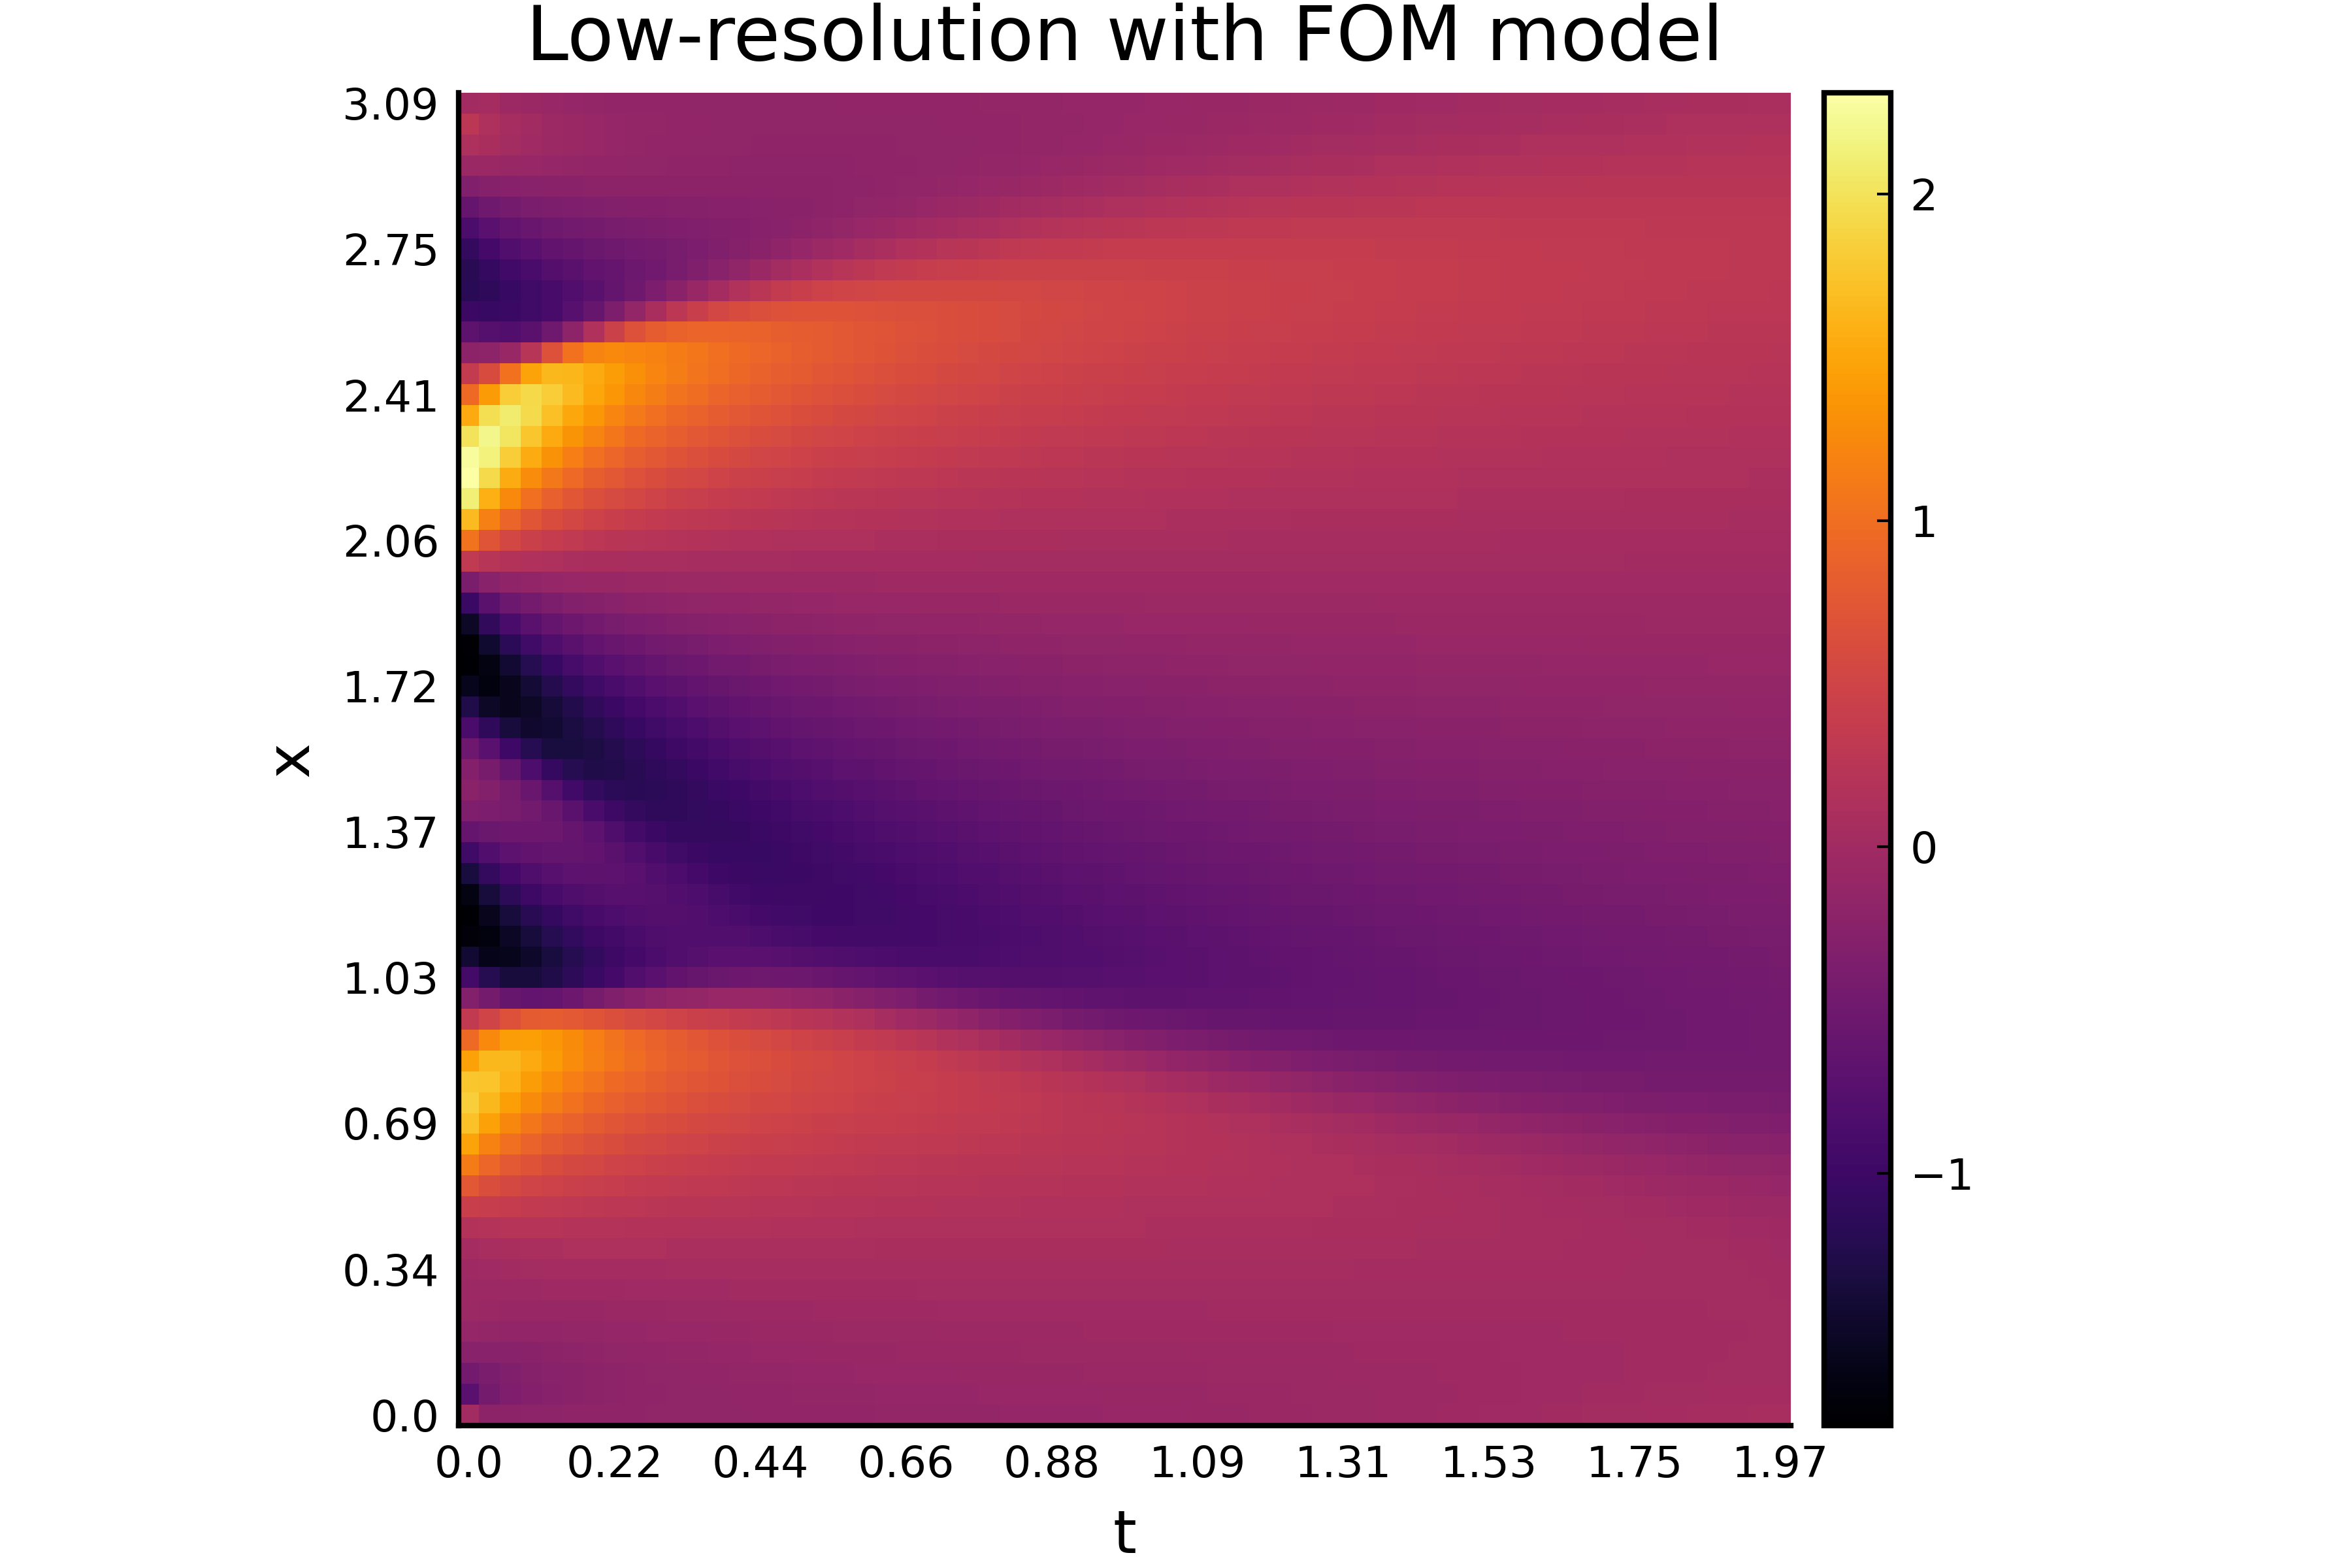

In [407]:
show_state(u, t, x, "Low-resolution with FOM model", "t", "x")

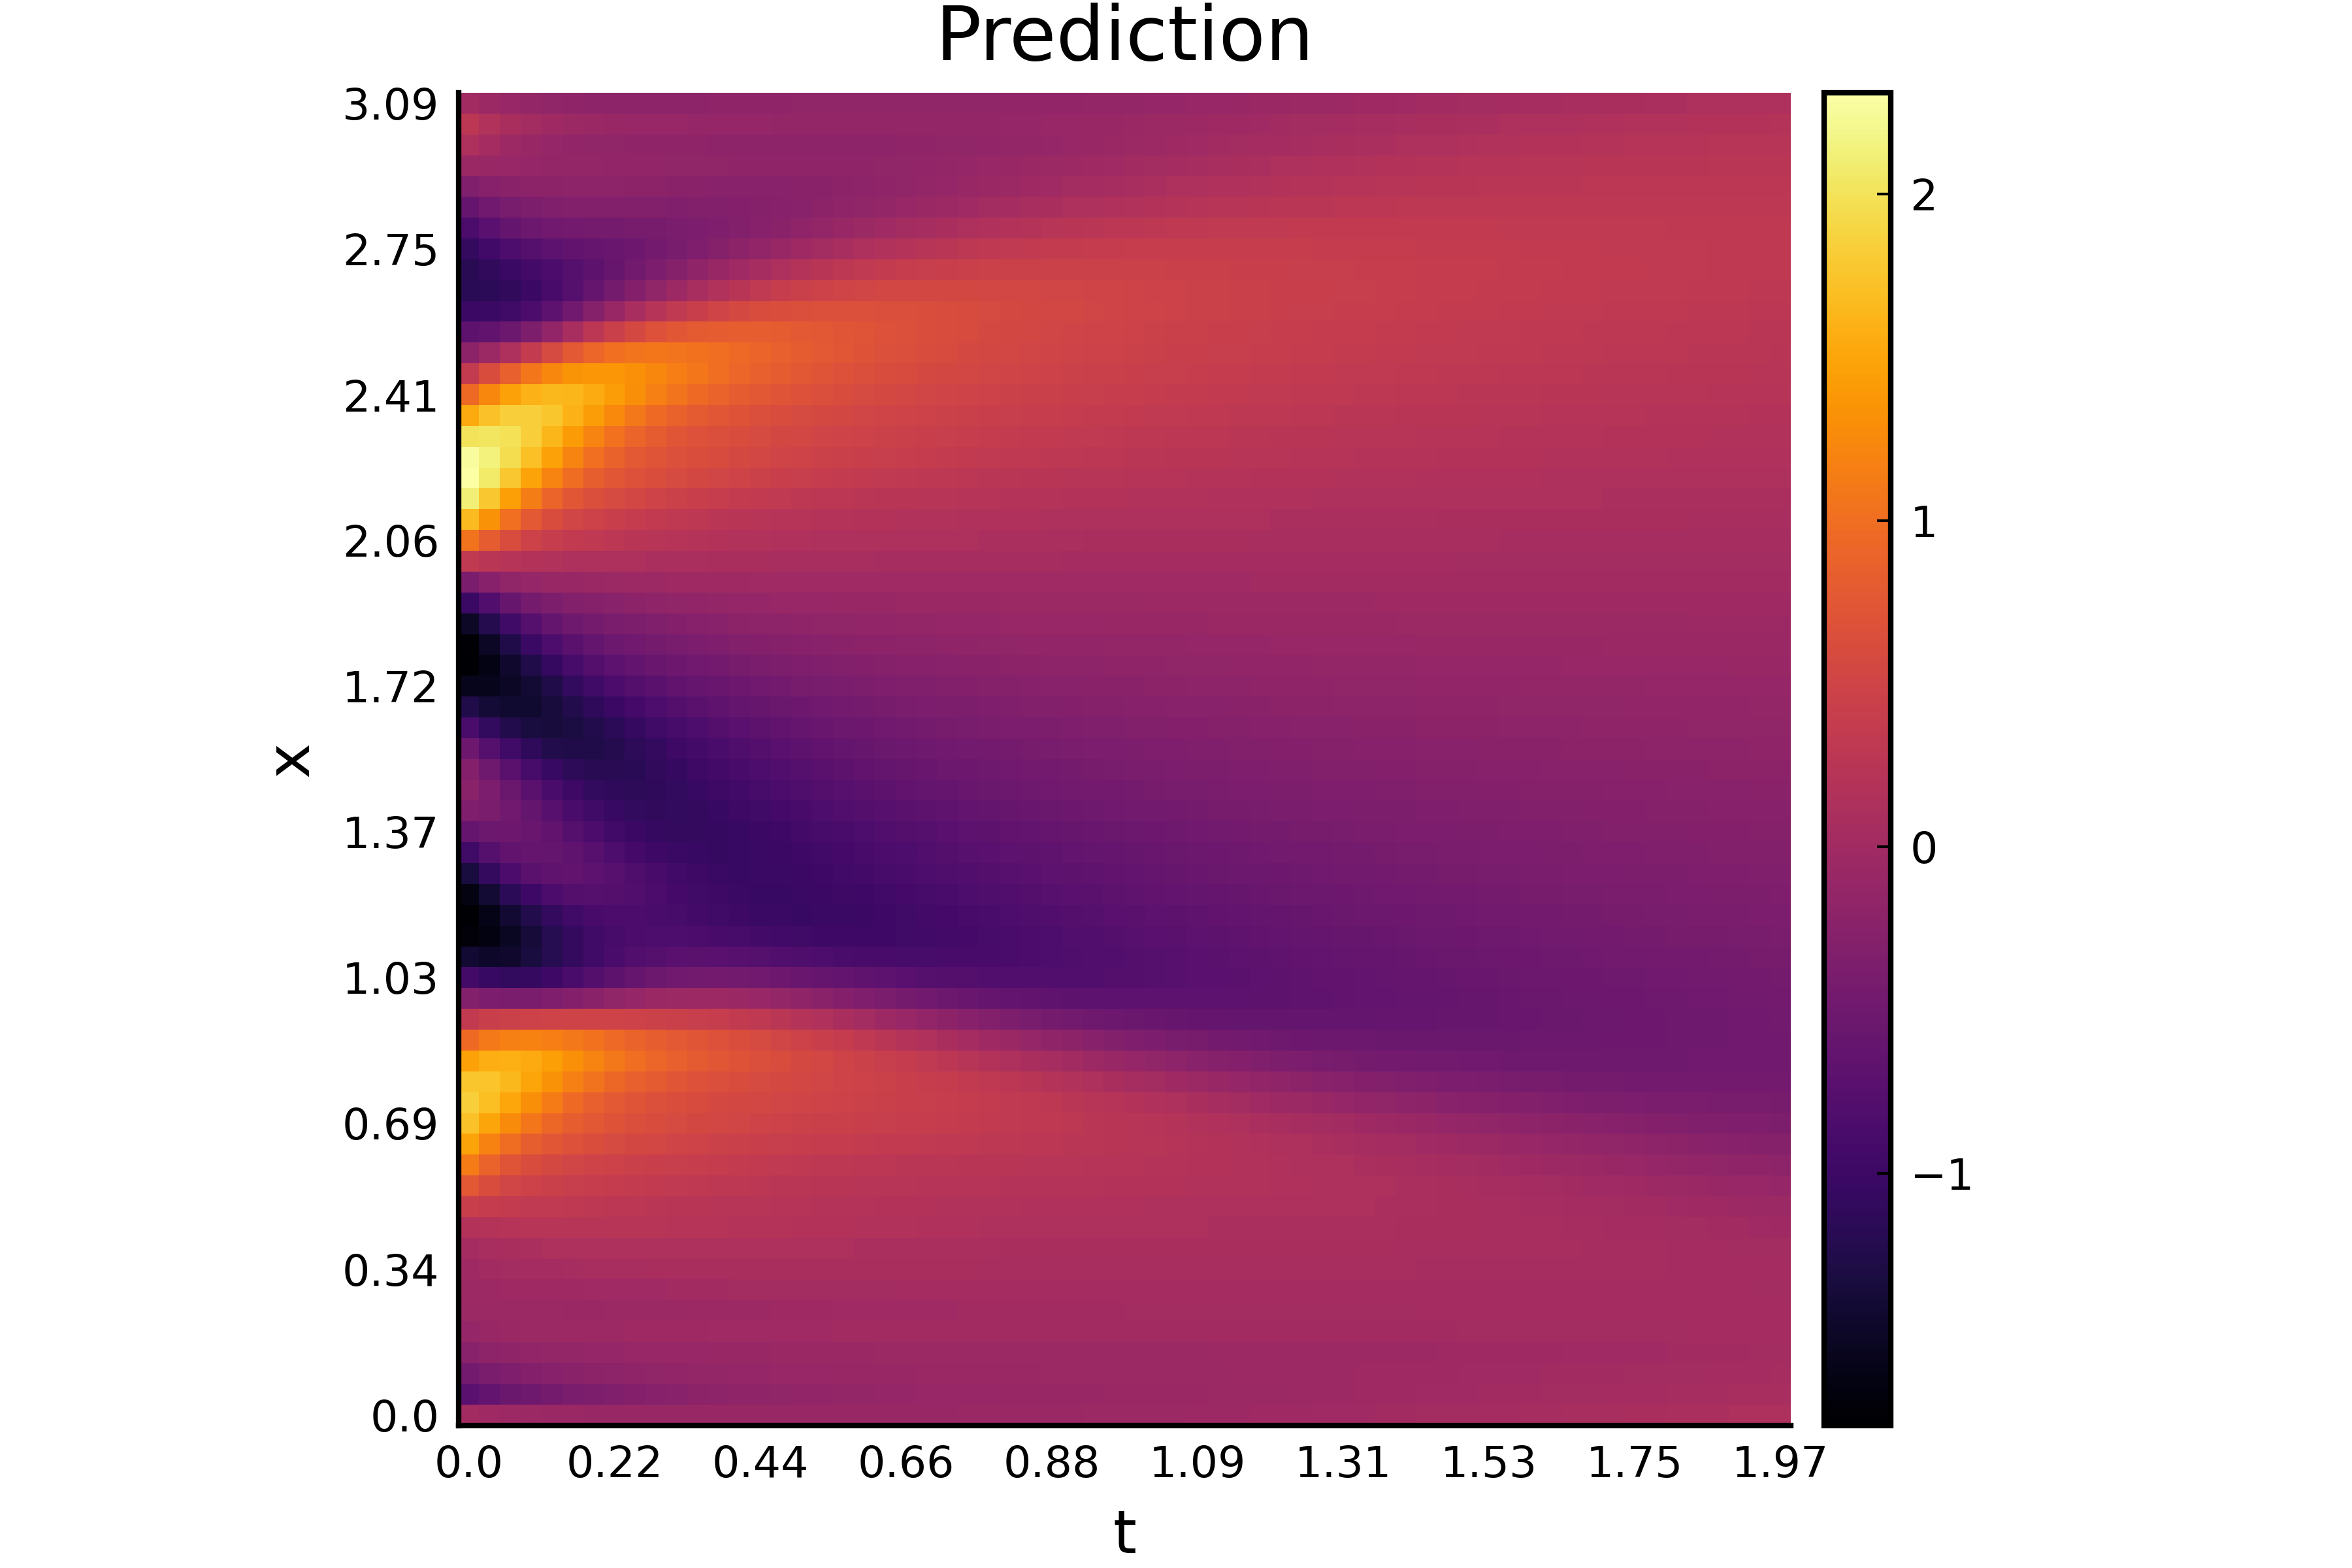

In [403]:
GraphicTools.show_state(hcat(u_pred.u...)[:, :, 1], t, x, "Prediction", "t", "x")

In [404]:
L1 = sum(abs.(hcat(u_pred.u...)[:, :, 1] .- u))
L2 = sum((hcat(u_pred.u...)[:, :, 1] .- u).^2)
MSE = Flux.mse(hcat(u_pred.u...)[:, :, 1], u)
println(L1)
println(L2)
println(MSE)

111.47076451469992
8.281993947301702
0.0020219711785404546


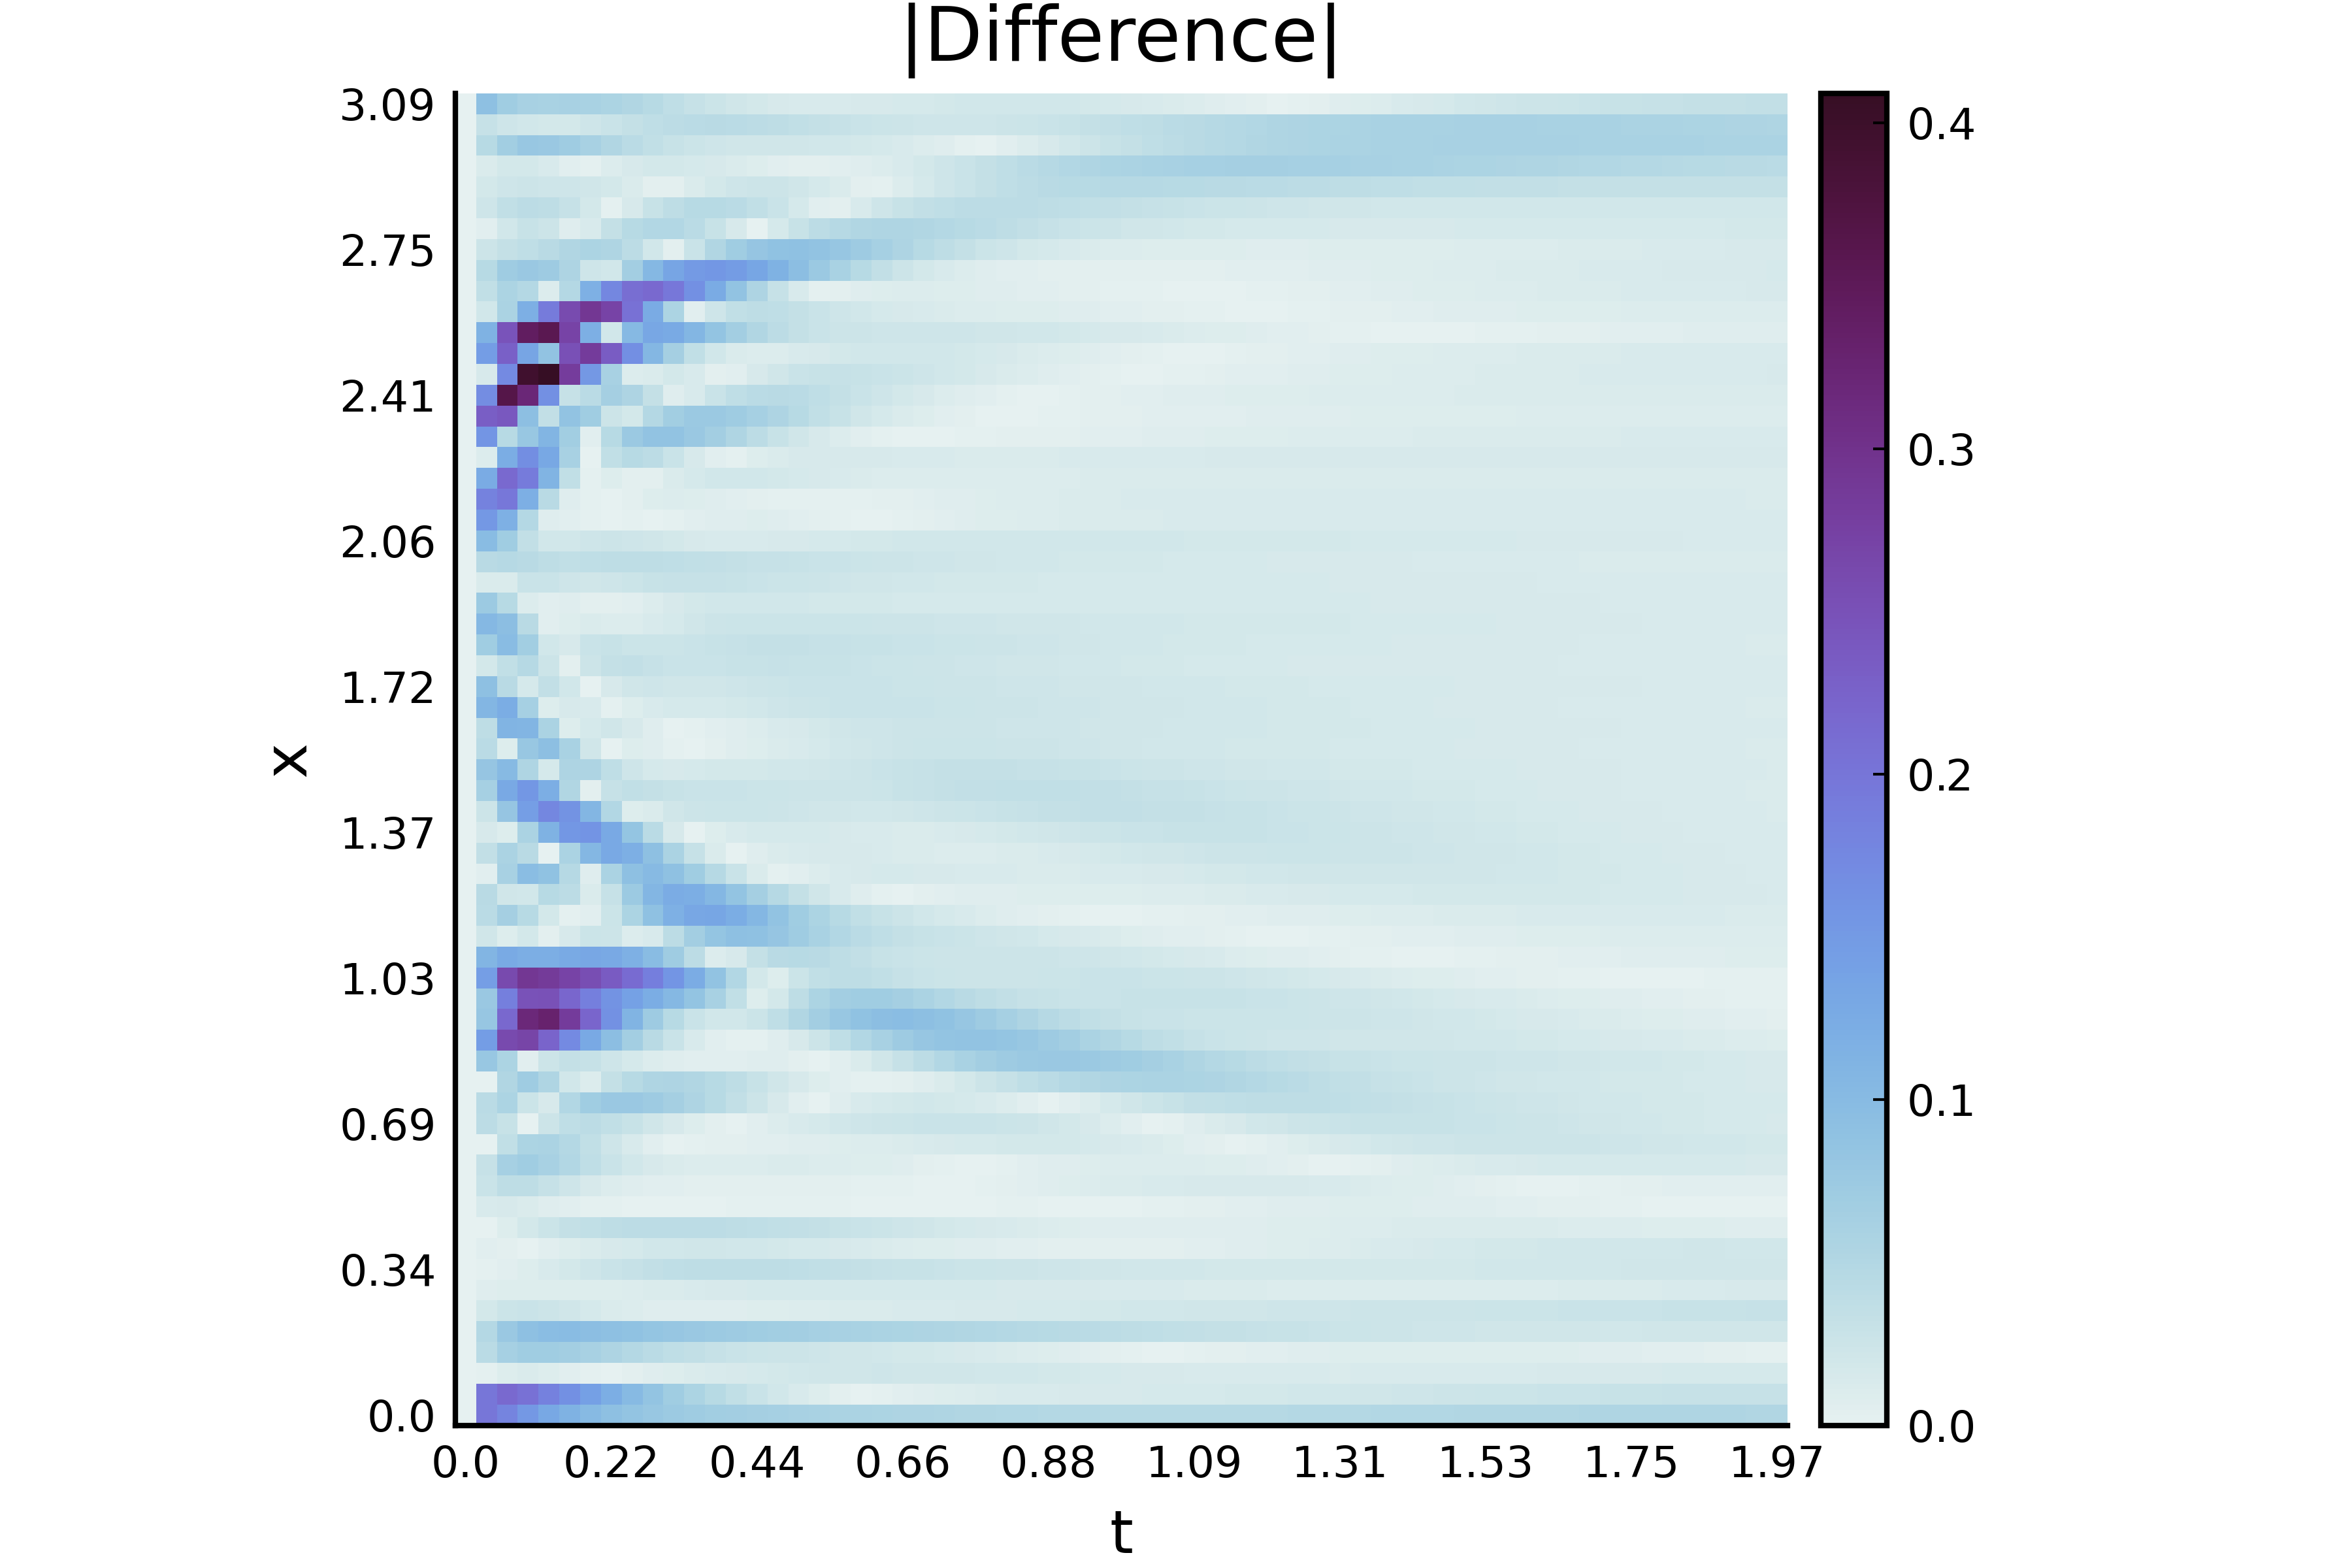

In [405]:
pl = GraphicTools.show_err(hcat(u_pred.u...)[:, :, 1], u, t, x, "|Difference|", "t", "x")

┌ Info: Saved animation to 
│   fn = /Users/vdesgrange/Development/Etudes/Thesis/closure-model/experiments/julia_src/neural_closure/snapshot_viscous_burgers_nu004_fps15.gif
└ @ Plots /Users/vdesgrange/.julia/packages/Plots/1KWPG/src/animation.jl:114


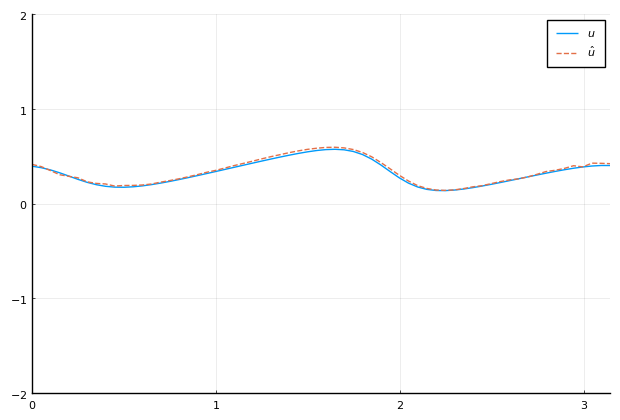

Plots.AnimatedGif("/Users/vdesgrange/Development/Etudes/Thesis/closure-model/experiments/julia_src/neural_closure/snapshot_viscous_burgers_nu004_fps15.gif")
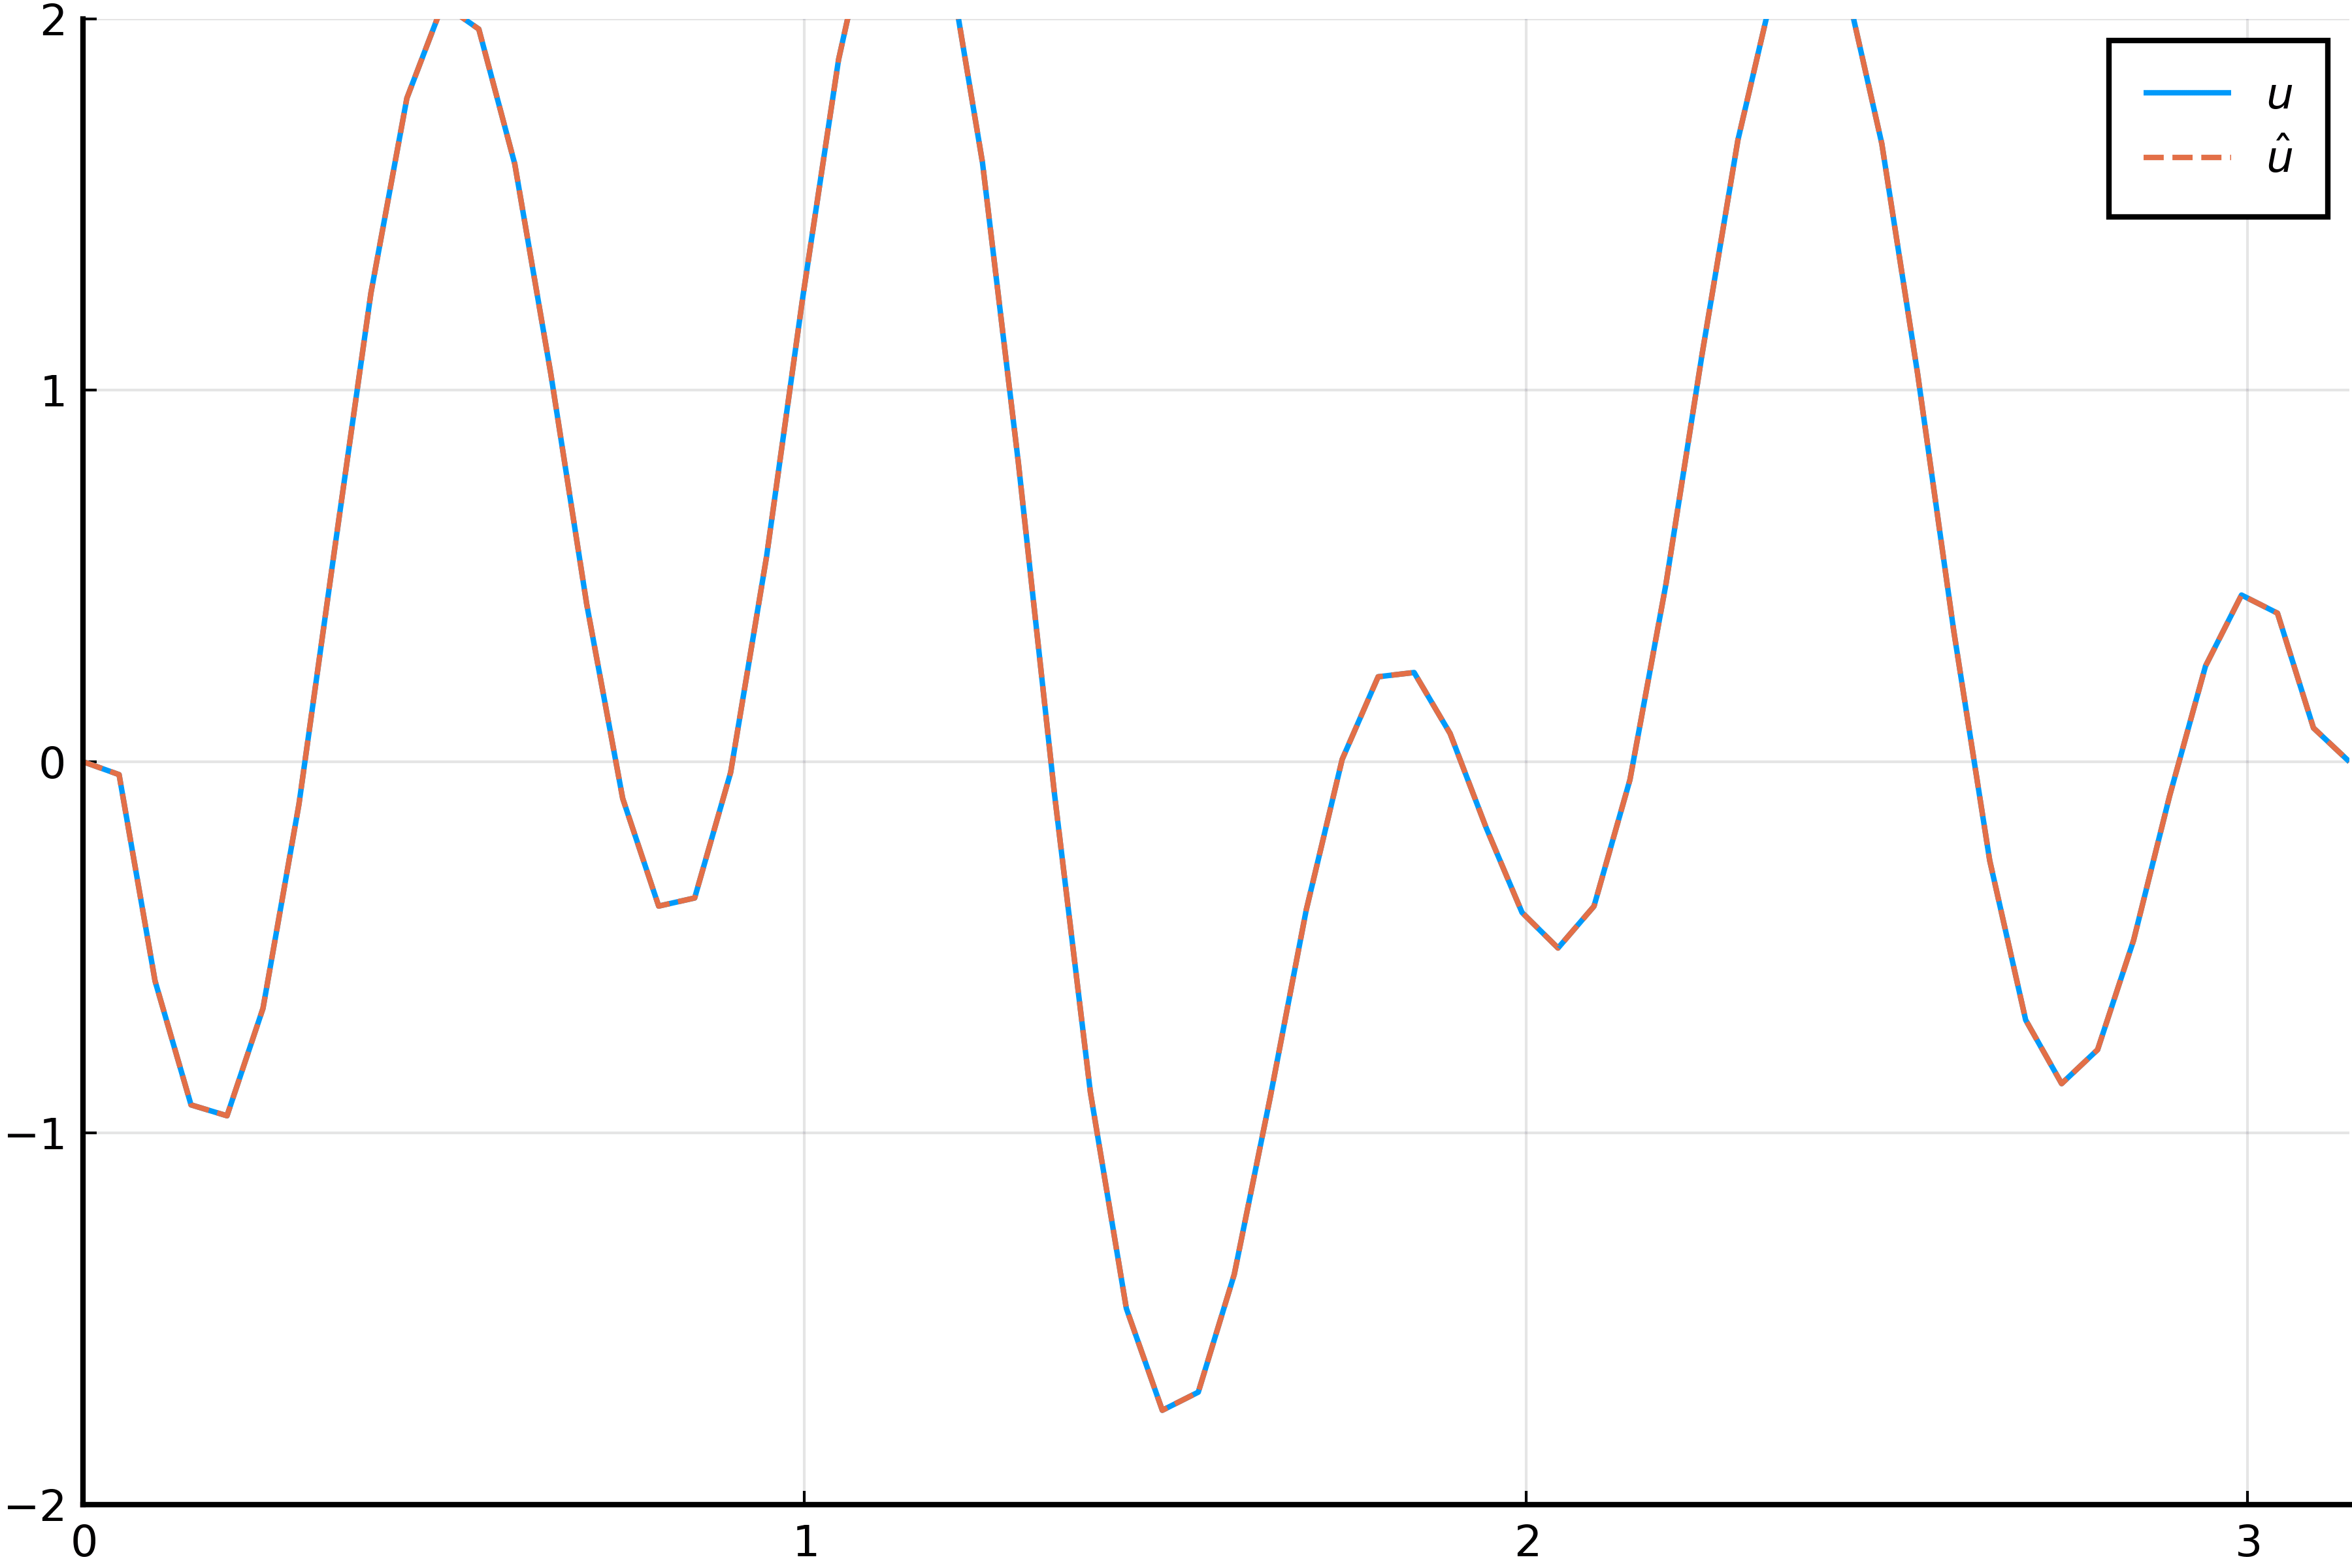

In [264]:
using Plots
function animate_snapshot_prediction(u_pred, u, x, filename)
    t_n = 64
   
    anim = @animate for i ∈ 1:t_n
        plt = plot(x, u[:, i], label=L"u")
        plot!(plt, x, u_pred[:, i], linestyle=:dash, label=L"\hat{u}")
        plot!(plt; xlims=(0., pi), ylims=(-2, 2.), dpi=600)
    end

    gif(anim, filename, fps = 15)
end

animate_snapshot_prediction(hcat(u_pred.u...)[:, :, 1], u, collect(LinRange(0., pi, 64)), "snapshot_viscous_burgers_nu004_fps15.gif")

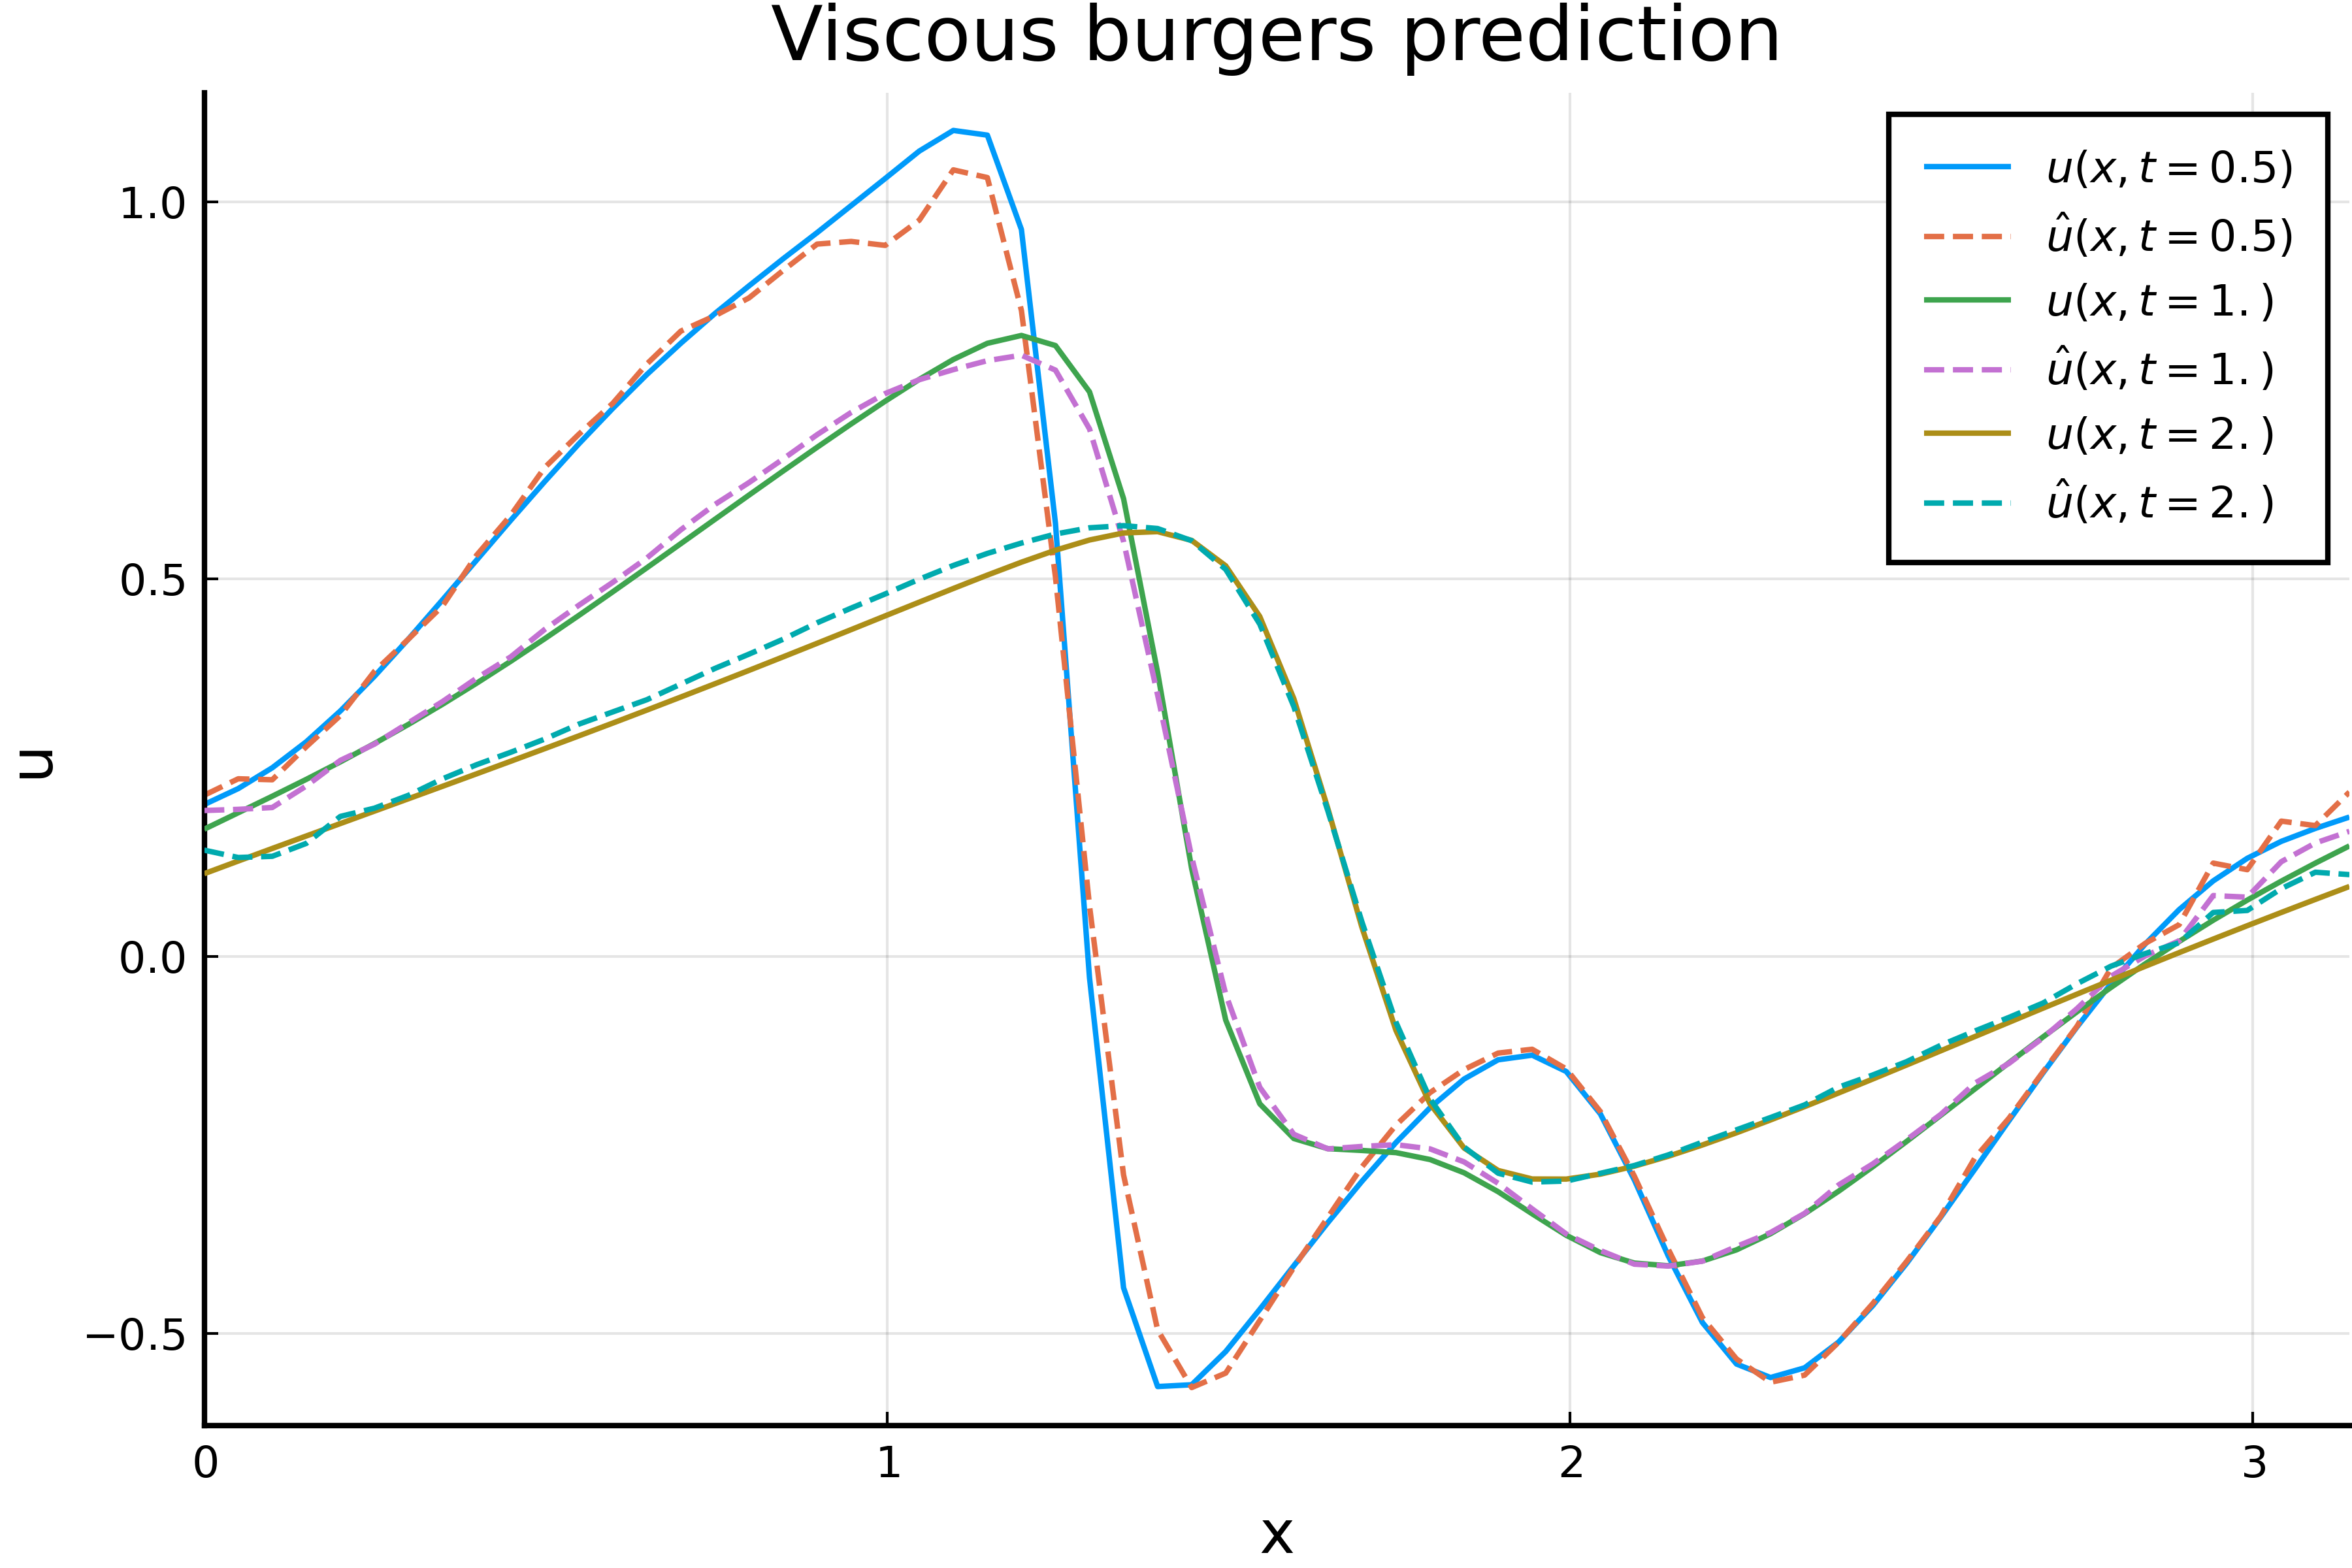

In [358]:

x = collect(LinRange(0., pi, 64));

plt = plot(title="Viscous burgers prediction", xlabel="x", ylabel="u")
plot!(plt; xlims=(0., pi), dpi=600)

plot!(plt, x, u[:, 16], label=L"u(x, t=0.5)")
plot!(plt, x, hcat(u_pred.u...)[:, 16, 1], linestyle=:dash, label=L"\hat{u}(x, t=0.5)")

plot!(plt, x, u[:, 32], label=L"u(x, t=1.)")
plot!(plt, x, hcat(u_pred.u...)[:, 32, 1], linestyle=:dash, label=L"\hat{u}(x, t=1.)")

plot!(plt, x, u[:, end], label=L"u(x, t=2.)")
plot!(plt, x, hcat(u_pred.u...)[:, end, 1], linestyle=:dash, label=L"\hat{u}(x, t=2.)")